In [1]:
from IPython.display import Image

In [24]:
import numpy as np
import pathlib
from pprint import pprint
import pandas as pd
from util import utils
import re
import os
from copy import deepcopy
import collections
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils.extmath import softmax

In [7]:
import pickle
import numpy as np
import pathlib
from pprint import pprint
import pandas as pd
from util import utils
import re
import os
from copy import deepcopy
import collections
from collections import defaultdict
import matplotlib.pyplot as plt
import random
from tqdm.auto import tqdm

In [3]:
from cycler import cycler
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pathlib
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import re
from util import utils
import os
from pathlib import Path

In [4]:
raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]


light_palette = np.array(raw_light_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255

Light mode palette


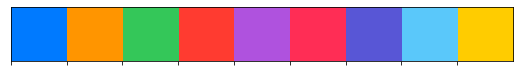

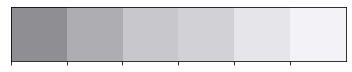

In [5]:
print('Light mode palette')
sns.palplot(light_palette)
sns.palplot(gray_light_palette)

In [6]:
# cmap 수정
mpl.rcParams['axes.prop_cycle'] = cycler('color',light_palette)
# 해상도 조정
mpl.rcParams['figure.dpi'] = 200
# ax의 우측과 상단 지우기
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [32]:
def open_pickle(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    return data

# 1  Analysis Across Retrievers
 - NQ only
 - DPR
 - SEAL
 - retriever

## why selection method result varies with the retriever?

| Dataset |  Retriever | Lower | Upper | Probe1 | Probe2 | Probe3 | Probe4 | Probe5 | Probe6 |
|:-------:|:----------:|:-----:|:-----:|:----------:|:----------:|:------------------------------------:|:----------:|:----------:|:----------:|
|         | DPR        |  52.5 |  62.3 |    58.1    |    56.3    | 61.8 |    61.7    |    55.2    |    56.0    |
|         | SEAL       |  50.0 |  59.4 |    43.9    |    30.0    |             52.9         |    44.9    |    52.5    |    44.6    |
|    NQ   | Contriever |  50.7 |  60.8 |    44.3    |    29.0    |             53.0          |    45.1    |    52.6    |    44.4    |
|         | DPR        |  72.3 |  77.7 |    76.2    |    75.1    | 77.6 |    77.4    |    73.8    |    74.0    |
|         | SEAL       |  67.1 |  72.3 |    67.9    |    51.5    | 72.5     |    63.7    |    72.3    |    63.9    |
|   TQA   | Contriever |  69.7 |  75.5 |    68.4    |    51.7    |             72.5           |    62.9    |    72.3    |    62.9    |

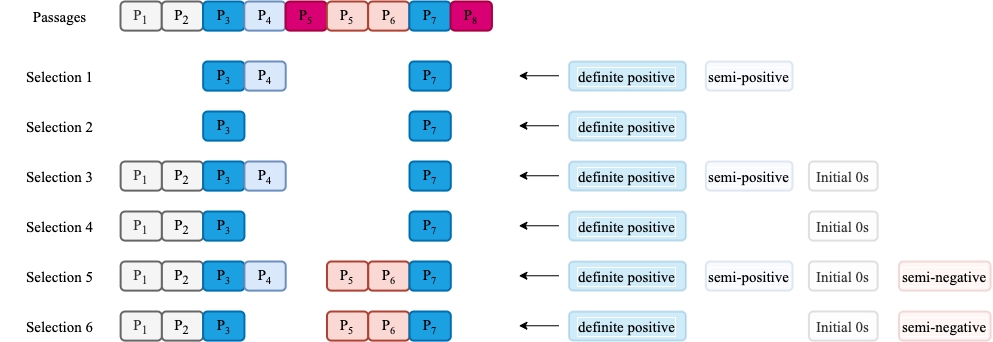

In [3]:
Image(filename='./img/selectionmethod2.drawio의 복사본.png', width=800)

## DPR's adversarial training allows to us have more definite positive 
    - DPR retrieved, NQ, TQA from FiD repo
    - not sure whether they used the normal-DPR, adv-DPR
    - now running incremental on Desktop2:gpu0

#### Need to test this basline DPR versus adversarial trained DPR version
    - It allows us to filter out semantically similar passages but not helpful to generate the answer.
    - Highly likely to contain more definite positive answers!
    
    Mock-up Example
    
     e.g.) Baseline DPR
     When is Sangryul's birthday?
     - Sangryul's birthday was yesterday 
     - Sangryul was born in March 29
     Above are all relevant
     
     e.g.) Adversarial DPR
     When is Sangryul's birthday?
     - Sangryul's birthday was yesterday -> relevant: but unable to answer the answer (not good)
     - Sangryul was born in March 29
     Only the second one is relevant

## DPR normal result


In [61]:
	ctx	em
0	1	0.306383
1	2	0.355601
2	3	0.379011
3	4	0.395455
4	5	0.403106
5	6	0.411785
6	7	0.417723
7	8	0.422405
8	9	0.429142
9	10	0.432111
10	11	0.437250
11	12	0.439077
12	13	0.440219
13	14	0.443188
14	15	0.444787
15	16	0.447299
16	17	0.448441
17	18	0.449355
18	19	0.450268
19	20	0.451639
20	21	0.452095
21	22	0.453352
22	23	0.454265
23	24	0.455293
24	25	0.456206
25	26	0.457463
26	27	0.457805
27	28	0.458833
28	29	0.458490
29	30	0.459404
30	31	0.459746
31	32	0.461688

SyntaxError: invalid syntax (<ipython-input-61-33a43b17a7e4>, line 1)

## DPR adv result


In [60]:
	ctx	em
0	1	0.342469
1	2	0.401507
2	3	0.429485
3	4	0.446614
4	5	0.458034
5	6	0.464885
6	7	0.471737
7	8	0.476533
8	9	0.477903
9	10	0.482129
10	11	0.484527
11	12	0.487724
12	13	0.490465
13	14	0.494462
14	15	0.495946
15	16	0.495489
16	17	0.497202
17	18	0.499600
18	19	0.500628
19	20	0.502113
20	21	0.504625
21	22	0.505082
22	23	0.505424
23	24	0.507480
24	25	0.508165
25	26	0.507366
26	27	0.509878
27	28	0.511362
28	29	0.511477
29	30	0.512276
30	31	0.512961
31	32	0.514788

SyntaxError: invalid syntax (<ipython-input-60-0c1a2bd0c6a6>, line 1)

# Checking how def-positive helps to infere the answer
## NQ

In [30]:
dpr_dev = '/scratch/philhoon-relevance/FiD/results/NQ_DPR/DEV/incremental_result_100/ctx100.json'
seal_dev = '/scratch/philhoon-relevance/FiD/results/NQ_SEAL/DEV/incremental_result_100/ctx100.json'
contriever_dev = '/scratch/philhoon-relevance/FiD/results/NQ_CONTRIEVER/DEV/incremental_result_100/ctx100.json'

In [31]:
dpr_dev = utils.open_json(dpr_dev)
seal_dev = utils.open_json(seal_dev)
contriever_dev = utils.open_json(contriever_dev)

In [39]:
def get_definite_pos_neg(test_em):
    positive_pos = []
    if test_em.startswith('1'):
        positive_pos.append(0)
    iter_ = re.finditer(r'01', test_em)
    for m in iter_:
        pos_ = m.start() + 1
        positive_pos.append(pos_)

    negative_pos = []
    iter_ = re.finditer(r'10', test_em)
    for m in iter_:
        pos_ = m.start() + 1
        negative_pos.append(pos_)
    
    return positive_pos, negative_pos

def get_semi_pos(test_em):
    semi_pos = []
    iter_ = re.finditer(r'(?=(11))', test_em)
    for m in iter_:
        semi_pos_ = m.start() + 1
        semi_pos.append(semi_pos_)
    
    return semi_pos

def get_semi_neg(test_em, num_undecisive):
    semi_neg = []
    test_em_temp = test_em[num_undecisive:]
    iter_ = re.finditer(r'(?=(00))', test_em_temp)
    for m in iter_:
        semi_neg_ = m.start() + 1
        semi_neg.append(semi_neg_)
    semi_neg = [i + num_undecisive for i in semi_neg]
    return semi_neg

In [41]:
def extract_statistics(input_file, method):
    output_format = []
    statistics_lst = []
    for id_, instance in enumerate(input_file, 1):
        output_dict = {}
        
        template_dict = {}
        if 'id' in instance.keys():
            template_dict['id'] = instance['id']
        else:
            template_dict['id'] = str(id_)
        template_dict['answers'] = instance['answers']
        template_dict['question'] = instance['question']
        template_dict['em_pattern'] = instance['em_pattern']

        em_pattern = deepcopy(instance['em_pattern'])
        instances_ = deepcopy(instance['ctxs'])
        instances_inference = deepcopy(instance['inference'])
        num_undecisive = len(em_pattern) - len(em_pattern.lstrip('0'))

        
        ## Meaing no EM
        if num_undecisive == 100:
            template_dict['ctxs']= instance['ctxs']
            output_format.append(template_dict)
        ## Meaning EM
        else:
#          check_lst = []
            # initial zeros
            new_context = []
            initial_zeros_lst = [i for i in range(0, num_undecisive)]

            # defnitie positive, definite negative
            defnite_positve_lst, defnite_negative_lst = get_definite_pos_neg(em_pattern)

            # semi positive, semi negative
            semi_positive_lst = get_semi_pos(em_pattern)
            semi_negative_lst = get_semi_neg(em_pattern, num_undecisive)

            if method == 'method1':
                new_context.extend(defnite_positve_lst)
                new_context.extend(semi_positive_lst)

            elif method == 'method2':
                new_context.extend(defnite_positve_lst)

            elif method == 'method3':
                new_context.extend(defnite_positve_lst)
                new_context.extend(semi_positive_lst)
                new_context.extend(initial_zeros_lst)
                
            elif method == 'method4':
                new_context.extend(defnite_positve_lst)
                new_context.extend(initial_zeros_lst)
                
            elif method == 'method5':
                defnite_positve_ctx_lst = [instances_[i] for i in defnite_positve_lst]
                defnite_negative_ctx_lst = [instances_[i] for i in defnite_negative_lst]
                semi_positive_ctx_lst = [instances_[i] for i in semi_positive_lst]
                semi_negative_ctx_lst = [instances_[i] for i in semi_negative_lst]
                initial_zeros_ctx_lst = [instances_[i] for i in initial_zeros_lst]
                
                defnite_positve_inference_lst = [instances_inference[i] for i in defnite_positve_lst]
                defnite_negative_inference_lst = [instances_inference[i] for i in defnite_negative_lst]
                semi_positive_inference_lst = [instances_inference[i] for i in semi_positive_lst]
                semi_negative_inference_lst = [instances_inference[i] for i in semi_negative_lst]
                initial_zeros_inference_lst = [instances_inference[i] for i in initial_zeros_lst]
                
                output_dict['definite_positive'] = {
                    'index' : defnite_positve_lst,
                    'ctx' : defnite_positve_ctx_lst,
                    'inference' : defnite_positve_inference_lst,
                    'question' : instance['question'],
                    'answers' : instance['answers'],
                }
                
                output_dict['definite_negative'] = {
                    'index' : defnite_negative_lst,
                    'ctx' : defnite_negative_ctx_lst,
                    'inference' : defnite_negative_inference_lst,
                    'question' : instance['question'],
                    'answers' : instance['answers'],
                }                

                output_dict['semi_positive'] = {
                    'index' : semi_positive_lst,
                    'ctx' : semi_positive_ctx_lst,
                    'inference' : semi_positive_inference_lst,
                    'question' : instance['question'],
                    'answers' : instance['answers'],
                }                            

                output_dict['semi_negative'] = {
                    'index' : semi_negative_lst,
                    'ctx' : semi_negative_ctx_lst,
                    'inference' : semi_negative_inference_lst,
                    'question' : instance['question'],
                    'answers' : instance['answers'],
                }            
                
                output_dict['initial_zeros'] = {
                    'index' : initial_zeros_lst,
                    'ctx' : initial_zeros_ctx_lst,
                    'inference' : initial_zeros_inference_lst,
                    'question' : instance['question'],
                    'answers' : instance['answers'],
                }  
                statistics_lst.append(output_dict)

            elif method == 'method6':
                new_context.extend(defnite_positve_lst)
                new_context.extend(semi_negative_lst)
                new_context.extend(initial_zeros_lst)

            if [item for item, count in collections.Counter(new_context).items() if count > 1]:
                print('Duplicates index!')
            else:
                new_context_lst = [instances_[i]for i in new_context]

            template_dict['ctxs'] = new_context_lst
            output_format.append(template_dict)
    return statistics_lst

In [43]:
dpr_dev_s = extract_statistics(dpr_dev, 'method5')
seal_dev_s = extract_statistics(seal_dev, 'method5')
contriever_dev_s = extract_statistics(contriever_dev, 'method5')

In [44]:
def cnt_ctx_with_answer(data, ctx_type):
    cnt = 0
    total_def_positive = 0
#     print(ctx_type)
    for instance in data:
        ctx_dict = instance[ctx_type]
        
        if not ctx_dict:
            continue
        total_def_positive += len(ctx_dict['index'])
        for answer_ in ctx_dict['answers']:
#             print(answer_)
            for ctx_ in ctx_dict['ctx']:
                total_text = ctx_['title'] + ctx_['text']
                if answer_ in total_text:
                    cnt += 1
    return cnt, total_def_positive
        
    

In [45]:
def show_stats_by_ctx_type(data):
    ctx_type_lst = ['definite_positive', 'definite_negative', 'semi_positive', 'semi_negative', 'initial_zeros']
    total_instance_with_anwer = 0
    for ctx_type_ in ctx_type_lst:
        ctx_with_answer, total_ctx = cnt_ctx_with_answer_index(data, ctx_type_)
        print(f'{ctx_type_}')
        print(f'total ctx : {total_ctx}')
        print(f'w/ answer : {ctx_with_answer}')
        print(f'ratio : {ctx_with_answer/total_ctx}')
        total_instance_with_anwer += ctx_with_answer
    print(f'total_instance_with_anwer : {total_instance_with_anwer}')
        

In [47]:
show_stats_by_ctx_type(dpr_dev_s)

definite_positive
total ctx : 6513
w/ answer : 5383
ratio : 0.8265008444649163
definite_negative
total ctx : 1912
w/ answer : 475
ratio : 0.24843096234309622
semi_positive
total ctx : 440478
w/ answer : 57894
ratio : 0.13143448707994496
semi_negative
total ctx : 72462
w/ answer : 7414
ratio : 0.10231569650299467
initial_zeros
total ctx : 24235
w/ answer : 4153
ratio : 0.1713637301423561
total_instance_with_anwer : 75319


In [48]:
show_stats_by_ctx_type(seal_dev_s)

definite_positive
total ctx : 6178
w/ answer : 2801
ratio : 0.4533829718355455
definite_negative
total ctx : 1803
w/ answer : 423
ratio : 0.23460898502495842
semi_positive
total ctx : 406500
w/ answer : 54066
ratio : 0.13300369003690038
semi_negative
total ctx : 66361
w/ answer : 7885
ratio : 0.11881978873133316
initial_zeros
total ctx : 39358
w/ answer : 7769
ratio : 0.19739316022155598
total_instance_with_anwer : 72944


In [49]:
show_stats_by_ctx_type(contriever_dev_s)

definite_positive
total ctx : 6490
w/ answer : 2951
ratio : 0.4546995377503852
definite_negative
total ctx : 2052
w/ answer : 510
ratio : 0.24853801169590642
semi_positive
total ctx : 414398
w/ answer : 54143
ratio : 0.13065458810129393
semi_negative
total ctx : 74871
w/ answer : 8767
ratio : 0.11709473627973448
initial_zeros
total ctx : 35289
w/ answer : 7586
ratio : 0.2149678370030321
total_instance_with_anwer : 73957


# Results
    - # definite positive 
        : DPR(6513) > SEAL(6178), Contriever(6490)
        -> better finding context related information 
    - Ratio of containing answer in definite positive
        : DPR(0.826) > SEAL(0.453), Contriever(0.454)
        -> Among related context, DPR has more changes having the right answer
    - # defnite negative
        : Damaging Passges
        -> relevant passages but having different context and answer prevent model to generate wrong answers
        -  SEAL(1803) > DPR (1912) > Contriever(2052)
    - Ratio of containing answer in definite negative
        - DPR(0.24), SEAL(0.23), Contriever(0.24)
    
    - This tells us that removing damaging passages significantly leverage the down-stream result with definite-positive retrievers.

## Plotting

In [50]:
def get_dist_by_type_index(data):
    dict_by_type = defaultdict(list)
    dict_by_index = defaultdict(list)
    dict_total_type = defaultdict(int)
        
    for instance in data:
        for key_type, ctx_type in instance.items():
            if not ctx_type:
                continue
            dict_total_type[key_type] += len(ctx_type['index'])
            for answer_ in ctx_type['answers']:
                for index_, ctx_ in zip(ctx_type['index'], ctx_type['ctx']):
                    total_text = ctx_['title'] + ctx_['text']
                    if answer_ in total_text:
                        dict_by_index[index_].append(key_type)
                        dict_by_type[key_type].append(index_) 
    
    return dict_by_type, dict_by_index, dict_total_type

In [51]:
def plots_by_type_rescale(dict_by_type, dict_total_type):
    bins= [i for i in range(1,102,10)]
    ctx_lst = list(dict_by_type.keys())
    ctx_lst.sort()
    fig, ax = plt.subplots(2,3, figsize=(15, 8), sharex=True, sharey=True)
    cnt = 0
    print(ctx_lst)
    for row in range(2):
        for col in range(3):
            if row == 1 and col ==2:
                break
#             print(cnt)
            ctx_type = ctx_lst[cnt]
            factor = dict_total_type[ctx_type]
            counts = np.ones_like(dict_by_type[ctx_type])
#           weights=factor*np.ones_like(data)
            ax[row][col].hist(dict_by_type[ctx_type], bins=bins, edgecolor="k", weights=counts/factor)
            cnt += 1
#             ax[row][col].xticks(bins)
            
#             ax[row][col].plot(df_normal_lst[cnt]['ctx'], df_normal_lst[cnt]['em'], label='EM', alpha = 0.3, linewidth=5, color = 'blue', marker = "o")    
#             ax[row][col].plot(df_incre_lst[cnt]['ctx'], df_incre_lst[cnt]['em'], label='AcEM', alpha = 0.3, linewidth=5, color = 'red', marker = "*")
#             cnt += 1
#             if row ==0 and col == 0:
#                 ax[row][col].set_title(f'DPR')
#             if row ==0 and col == 1:
#                 ax[row][col].set_title(f'SEAL')
#             if row ==0 and col == 2:
#                 ax[row][col].set_title(f'Contriever')
#             if row == 0 and col == 0:
#                 ax[row][col].set_ylabel(f'Natural Questions', fontsize = 15)
#             if row == 1 and col == 0:
#                 ax[row][col].set_ylabel(f'TriviaQA', fontsize = 15)

    # ax.legend(title='Normal vs Accumulated', fontsize = 'x-small')
    # handles, labels = ax[row][col].get_legend_handles_labels()
    # fig.legend(handles, labels, loc='upper center')


    # lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    # lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    # fig.legend(lines, labels, loc='upper center', ncol=2)
#     handles, labels = ax[row][col].get_legend_handles_labels()
#     fig.legend(handles, labels, loc='lower center', ncol=2, fontsize = 15)
#     fig.suptitle('Incremental Inference on Natural Questions, TrivaQA', fontsize = 15)
#     plt.savefig(plot_path, format="pdf", bbox_inches="tight")
    plt.show()


['definite_negative', 'definite_positive', 'initial_zeros', 'semi_negative', 'semi_positive']


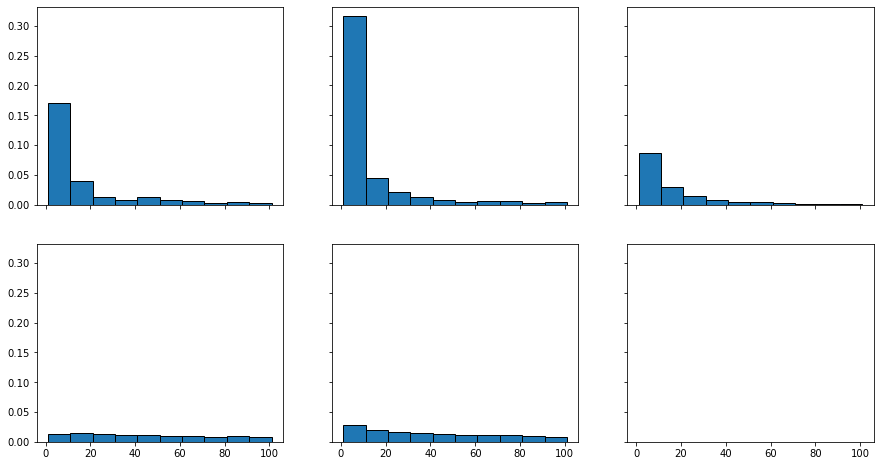

In [53]:
dict_by_type, dict_by_index, dict_total_type = get_dist_by_type_index(dpr_dev_s)
plots_by_type_rescale(dict_by_type, dict_total_type)

['definite_negative', 'definite_positive', 'initial_zeros', 'semi_negative', 'semi_positive']


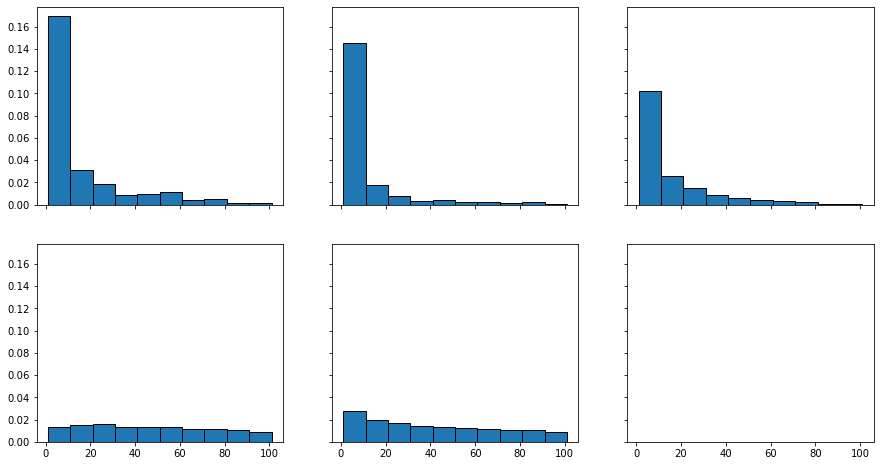

In [55]:
dict_by_type, dict_by_index, dict_total_type = get_dist_by_type_index(seal_dev_s)
plots_by_type_rescale(dict_by_type, dict_total_type)

['definite_negative', 'definite_positive', 'initial_zeros', 'semi_negative', 'semi_positive']


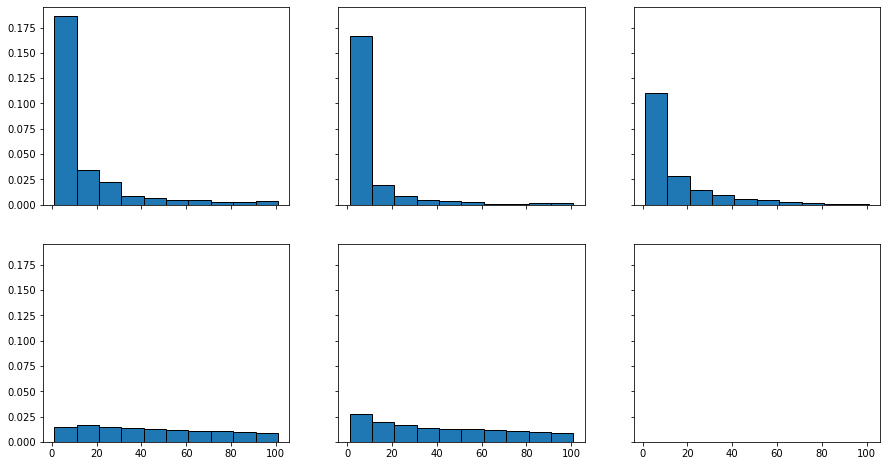

In [56]:
dict_by_type, dict_by_index, dict_total_type = get_dist_by_type_index(contriever_dev_s)
plots_by_type_rescale(dict_by_type, dict_total_type)

# Checking how def-positive helps to infere the answer
## TQA

In [57]:
dpr_dev = '/scratch/philhoon-relevance/FiD/results/TQA_DPR/DEV/incremental_result_100/ctx100.json'
seal_dev = '/scratch/philhoon-relevance/FiD/results/TQA_SEAL/DEV/incremental_result_100/ctx100.json'
contriever_dev = '/scratch/philhoon-relevance/FiD/results/TQA_CONTRIEVER/DEV/incremental_result_100/ctx100.json'

In [58]:
dpr_dev = utils.open_json(dpr_dev)
seal_dev = utils.open_json(seal_dev)
contriever_dev = utils.open_json(contriever_dev)

In [59]:
dpr_dev_s = extract_statistics(dpr_dev, 'method5')
seal_dev_s = extract_statistics(seal_dev, 'method5')
contriever_dev_s = extract_statistics(contriever_dev, 'method5')

In [60]:
show_stats_by_ctx_type(dpr_dev_s)

definite_positive
total ctx : 7749
w/ answer : 6068
ratio : 0.783068783068783
definite_negative
total ctx : 1356
w/ answer : 312
ratio : 0.23008849557522124
semi_positive
total ctx : 617739
w/ answer : 145712
ratio : 0.23587955431015364
semi_negative
total ctx : 41517
w/ answer : 4630
ratio : 0.11152058193029361
initial_zeros
total ctx : 18639
w/ answer : 2394
ratio : 0.12844036697247707
total_instance_with_anwer : 159116


In [61]:
show_stats_by_ctx_type(seal_dev_s)

definite_positive
total ctx : 7317
w/ answer : 4031
ratio : 0.5509088424217575
definite_negative
total ctx : 1379
w/ answer : 364
ratio : 0.2639593908629442
semi_positive
total ctx : 558537
w/ answer : 135909
ratio : 0.24333034337922108
semi_negative
total ctx : 38532
w/ answer : 5382
ratio : 0.1396761133603239
initial_zeros
total ctx : 33835
w/ answer : 8278
ratio : 0.24465789862568346
total_instance_with_anwer : 153964


In [62]:
show_stats_by_ctx_type(contriever_dev_s)

definite_positive
total ctx : 7654
w/ answer : 4259
ratio : 0.5564410765612752
definite_negative
total ctx : 1490
w/ answer : 399
ratio : 0.2677852348993289
semi_positive
total ctx : 588172
w/ answer : 140800
ratio : 0.23938575790755084
semi_negative
total ctx : 43023
w/ answer : 5603
ratio : 0.1302326662482858
initial_zeros
total ctx : 26861
w/ answer : 6176
ratio : 0.22992442574736607
total_instance_with_anwer : 157237


# Results
    - Results are algined with NQ case
    - # definite positive 
        : DPR(7749) > SEAL(7317), Contriever(7654)
        -> better finding context related information 
    - Ratio of containing answer in definite positive
        : DPR(0.783) > SEAL(0.550), Contriever(0.556)
        -> Among related context, DPR has more changes having the right answer
    - # defnite negative
        : Damaging Passges
        -> relevant passages but having different context and answer prevent model to generate wrong answers
        -  SEAL(1379) > DPR (1356) > Contriever(1490)
    - Ratio of containing answer in definite negative
        - DPR(0.230), SEAL(0.263), Contriever(0.267)
    
    - This tells us that removing damaging passages significantly leverage the down-stream result with definite-positive retrievers.

['definite_negative', 'definite_positive', 'initial_zeros', 'semi_negative', 'semi_positive']


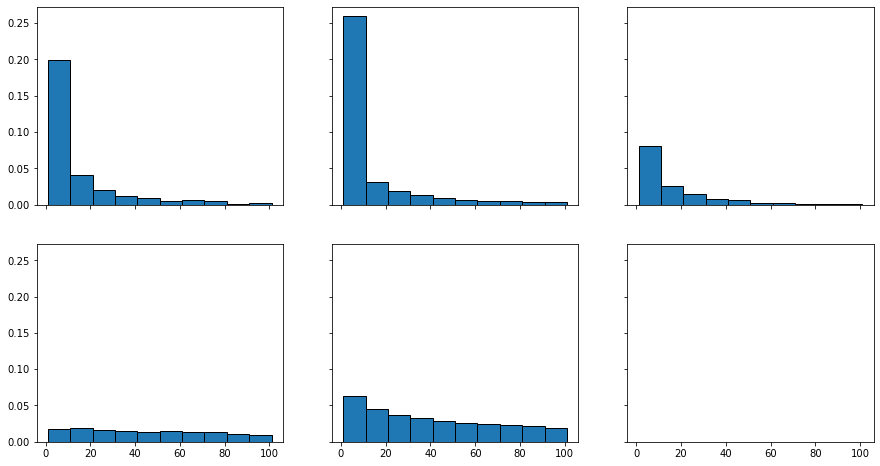

In [63]:
dict_by_type, dict_by_index, dict_total_type = get_dist_by_type_index(dpr_dev_s)
plots_by_type_rescale(dict_by_type, dict_total_type)

['definite_negative', 'definite_positive', 'initial_zeros', 'semi_negative', 'semi_positive']


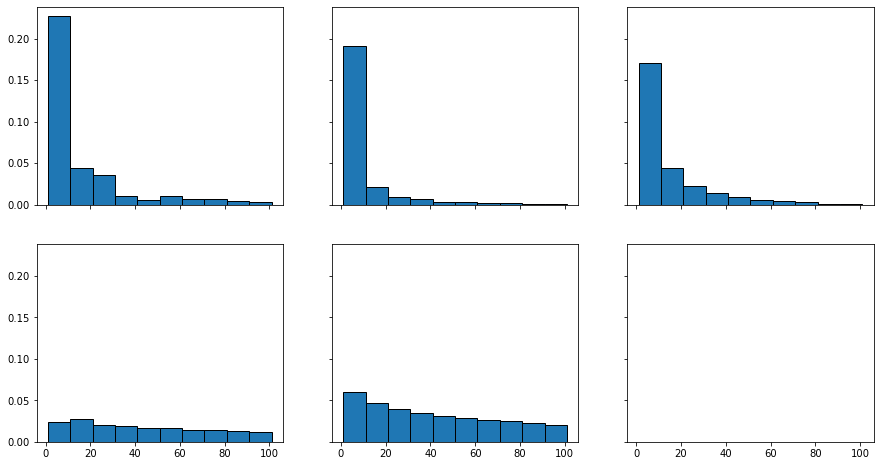

In [64]:
dict_by_type, dict_by_index, dict_total_type = get_dist_by_type_index(seal_dev_s)
plots_by_type_rescale(dict_by_type, dict_total_type)

['definite_negative', 'definite_positive', 'initial_zeros', 'semi_negative', 'semi_positive']


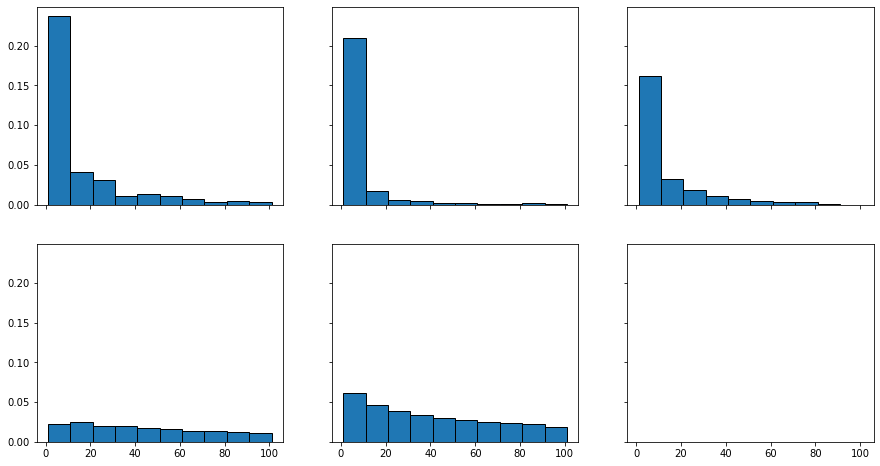

In [65]:
dict_by_type, dict_by_index, dict_total_type = get_dist_by_type_index(contriever_dev_s)
plots_by_type_rescale(dict_by_type, dict_total_type)

# 2 What drives the positive definite? Check Attention-score
    - Passges Level Attention Score
        : Passage Level Attention Score on the first decoded token (FiD-KD)
    - Passges Level Attention Score on Last Layer
        : Passage Level Attention Score on the first decoded token on Last Layer
    - Token Level Attention Score on Last Layer (Max)
        : Token Level Attention Score on the first decoded token on Last Layer
    - Token Level Attention Score on First Layer (Min)
        : Token Level Attention Score on the first decoded token on Last Layer

## Passges Level Attention Score
    : Passage Level Attention Score on the first decoded token - average all layers (FiD-KD)

In [9]:
dataset = 'NQ'
retriever = 'DPR'
datatype = 'DEV'
sample_size = 100

In [10]:
input_file = f'/scratch/philhoon-relevance/FiD/results/{dataset}_{retriever}/{datatype}/incremental_result_{sample_size}/ctx{sample_size}.json'
input_ = utils.open_json(input_file)

In [11]:
def get_attention_score(k, ctx_lst):
    attention_score_lst = []
    for i in range(0, k):
        attention_score_lst.append(ctx_lst[i]['score'])
    return attention_score_lst

In [13]:
def get_attention():
    attention_dict = defaultdict(list)
    for i in tqdm(range(1, 21)):    
        attention_file = f'/data/philhoon-relevance/FiD/results/NQ_DPR/DEV_ATT/NQ_dev_{i}_context/dataset_wscores.json'
        attention_input_ = utils.open_json(attention_file)
        for instance in attention_input_:
            attention_score_lst = get_attention_score(i, instance['ctxs'])
            attention_dict[instance['id']].append(attention_score_lst)
    return attention_dict

In [15]:
def merge(input_, attention_dict):
    for index, instance in enumerate(input_, 0):
        instance['attention_score'] = attention_dict[index]
    return input_

In [16]:
attention_dict = get_attention()
input_attention = merge(input_, attention_dict)

  0%|          | 0/20 [00:00<?, ?it/s]

In [17]:
def get_heatmap(np_array_attention, x_tick_labels, answer):
    arr2 = np_array_attention
    mask = np.zeros_like(arr2)
    mask[np.triu_indices_from(mask, k = 1)] = True
#     print(x_tick_labels)
    y_tick_labels = range(1, len(x_tick_labels)+1)
    fig, ax = plt.subplots(1,1 ,figsize=(12, 12))
    sns.heatmap(arr2, ax=ax,
                center=0,
                annot=True, 
                fmt='.3f', # d
                cmap='coolwarm',
                linewidth=0.1, square=True,
                mask=mask,
                annot_kws={'size': 7},
                yticklabels = y_tick_labels,
                xticklabels = x_tick_labels
#                 xlabel = 'EM Pattern'
               )
    plt.xticks(fontsize=7, rotation=45, horizontalalignment='right')
    plt.xlabel(f'EM match : answer {answer}', fontsize = 10) # x-axis label with fontsize 15
    plt.ylabel('# of passage', fontsize = 10) # y-axis label with fontsize 15
    plt.show()

In [18]:
def transform_to_np(index, input_attention, passage_size, option='softmax'):
    
    arr2 = np.full(shape=(passage_size, passage_size), fill_value=-9999, dtype=float)
    
    test = input_attention[index]['attention_score']
    answer = input_attention[index]['answers']
    
    x_tick_labels_lst = []
    for em_p, infer_ in zip(input_attention[index]['em_pattern'][:passage_size], input_attention[index]['inference'][:passage_size]):
        x_tick_label = f'{str(em_p)} \n {infer_}'
        x_tick_labels_lst.append(x_tick_label)
#     x_tick_labels = input_attention[index]['em_pattern'][:passage_size]
#     print(x_tick_labels_lst)
    for x_index, x_lst in enumerate(test[:passage_size], 0):
            for y_index, value in enumerate(x_lst, 0):
                arr2[x_index][y_index] = value
    if option == 'softmax':        
        arr2 = softmax(arr2)
    return arr2, x_tick_labels_lst, answer

In [19]:
def get_attention_dict(attention_path, option1 = 'max', option2='last'):
    attention_dict = defaultdict(list)
    for i in tqdm(range(1, 21)):
        attention_file = attention_path + f'NQ_dev_{i}_context/attention_score.pickle'
        data = open_pickle(attention_file)
        for ins in data:
            # get the attention score on the last layer first decoded token
            # last file differnt
            if option2 == 'last':
                score = ins['attention_score'][:, 0, -1, :]
            elif option2 == 'first':
                score = ins['attention_score'][:, 0, 0, :]
                
            # get the max attention score
            if option1 == 'max':
                attention_score = score.max(1).values
            elif option1 == 'min':
                attention_score = score.min(1).values
            else:
                attention_score = score.average(1).values
            attention_score_lst  = attention_score.tolist()        
            # id
            id_ = ins['id'].item()
            attention_dict[id_].append(attention_score_lst)
        del data
        
    return attention_dict

In [20]:
def get_definite_pos_neg(test_em):
    positive_pos = []
    if test_em.startswith('1'):
        positive_pos.append(0)
    iter_ = re.finditer(r'01', test_em)
    for m in iter_:
        pos_ = m.start() + 1
        positive_pos.append(pos_)

    negative_pos = []
    iter_ = re.finditer(r'10', test_em)
    for m in iter_:
        pos_ = m.start() + 1
        negative_pos.append(pos_)
    
    return positive_pos, negative_pos

In [21]:
def get_distplot(atten_def_pos, atten_def_neg, atten_rest):
    fig, ax = plt.subplots(1,1 ,figsize=(10, 9))
    sns.histplot(atten_def_pos, ax = ax, label='def_pos')
    sns.histplot(atten_def_neg, ax = ax, label='def_neg')
    sns.histplot(atten_rest, ax = ax, label='rest')
    plt.legend()
    plt.show()
    

In [22]:
def get_attention_defpos_defneg_rest(input_attention, passage_size):
    def_pos_attention_score_lst = []
    def_neg_attention_score_lst = []
    def_rest_lst = []
    for instance in input_attention:
        pos_, neg_ = get_definite_pos_neg(instance['em_pattern'][:passage_size])
        attention_ = np.array(instance['attention_score'][passage_size-1])
        attention_ = attention_[None, :]
        attention_softmax_ = softmax(attention_)
        
        if attention_softmax_.shape[0] != 1:
            print('Wrong outcome')
            break
        
        for index_ in range(0, passage_size):
            if index_ in pos_:
                def_pos_attention_score_lst.append(attention_softmax_[0, index_])
            elif index_ in neg_:
                def_neg_attention_score_lst.append(attention_softmax_[0, index_])
            else:
                def_rest_lst.append(attention_softmax_[0, index_])

    return def_pos_attention_score_lst, def_neg_attention_score_lst, def_rest_lst

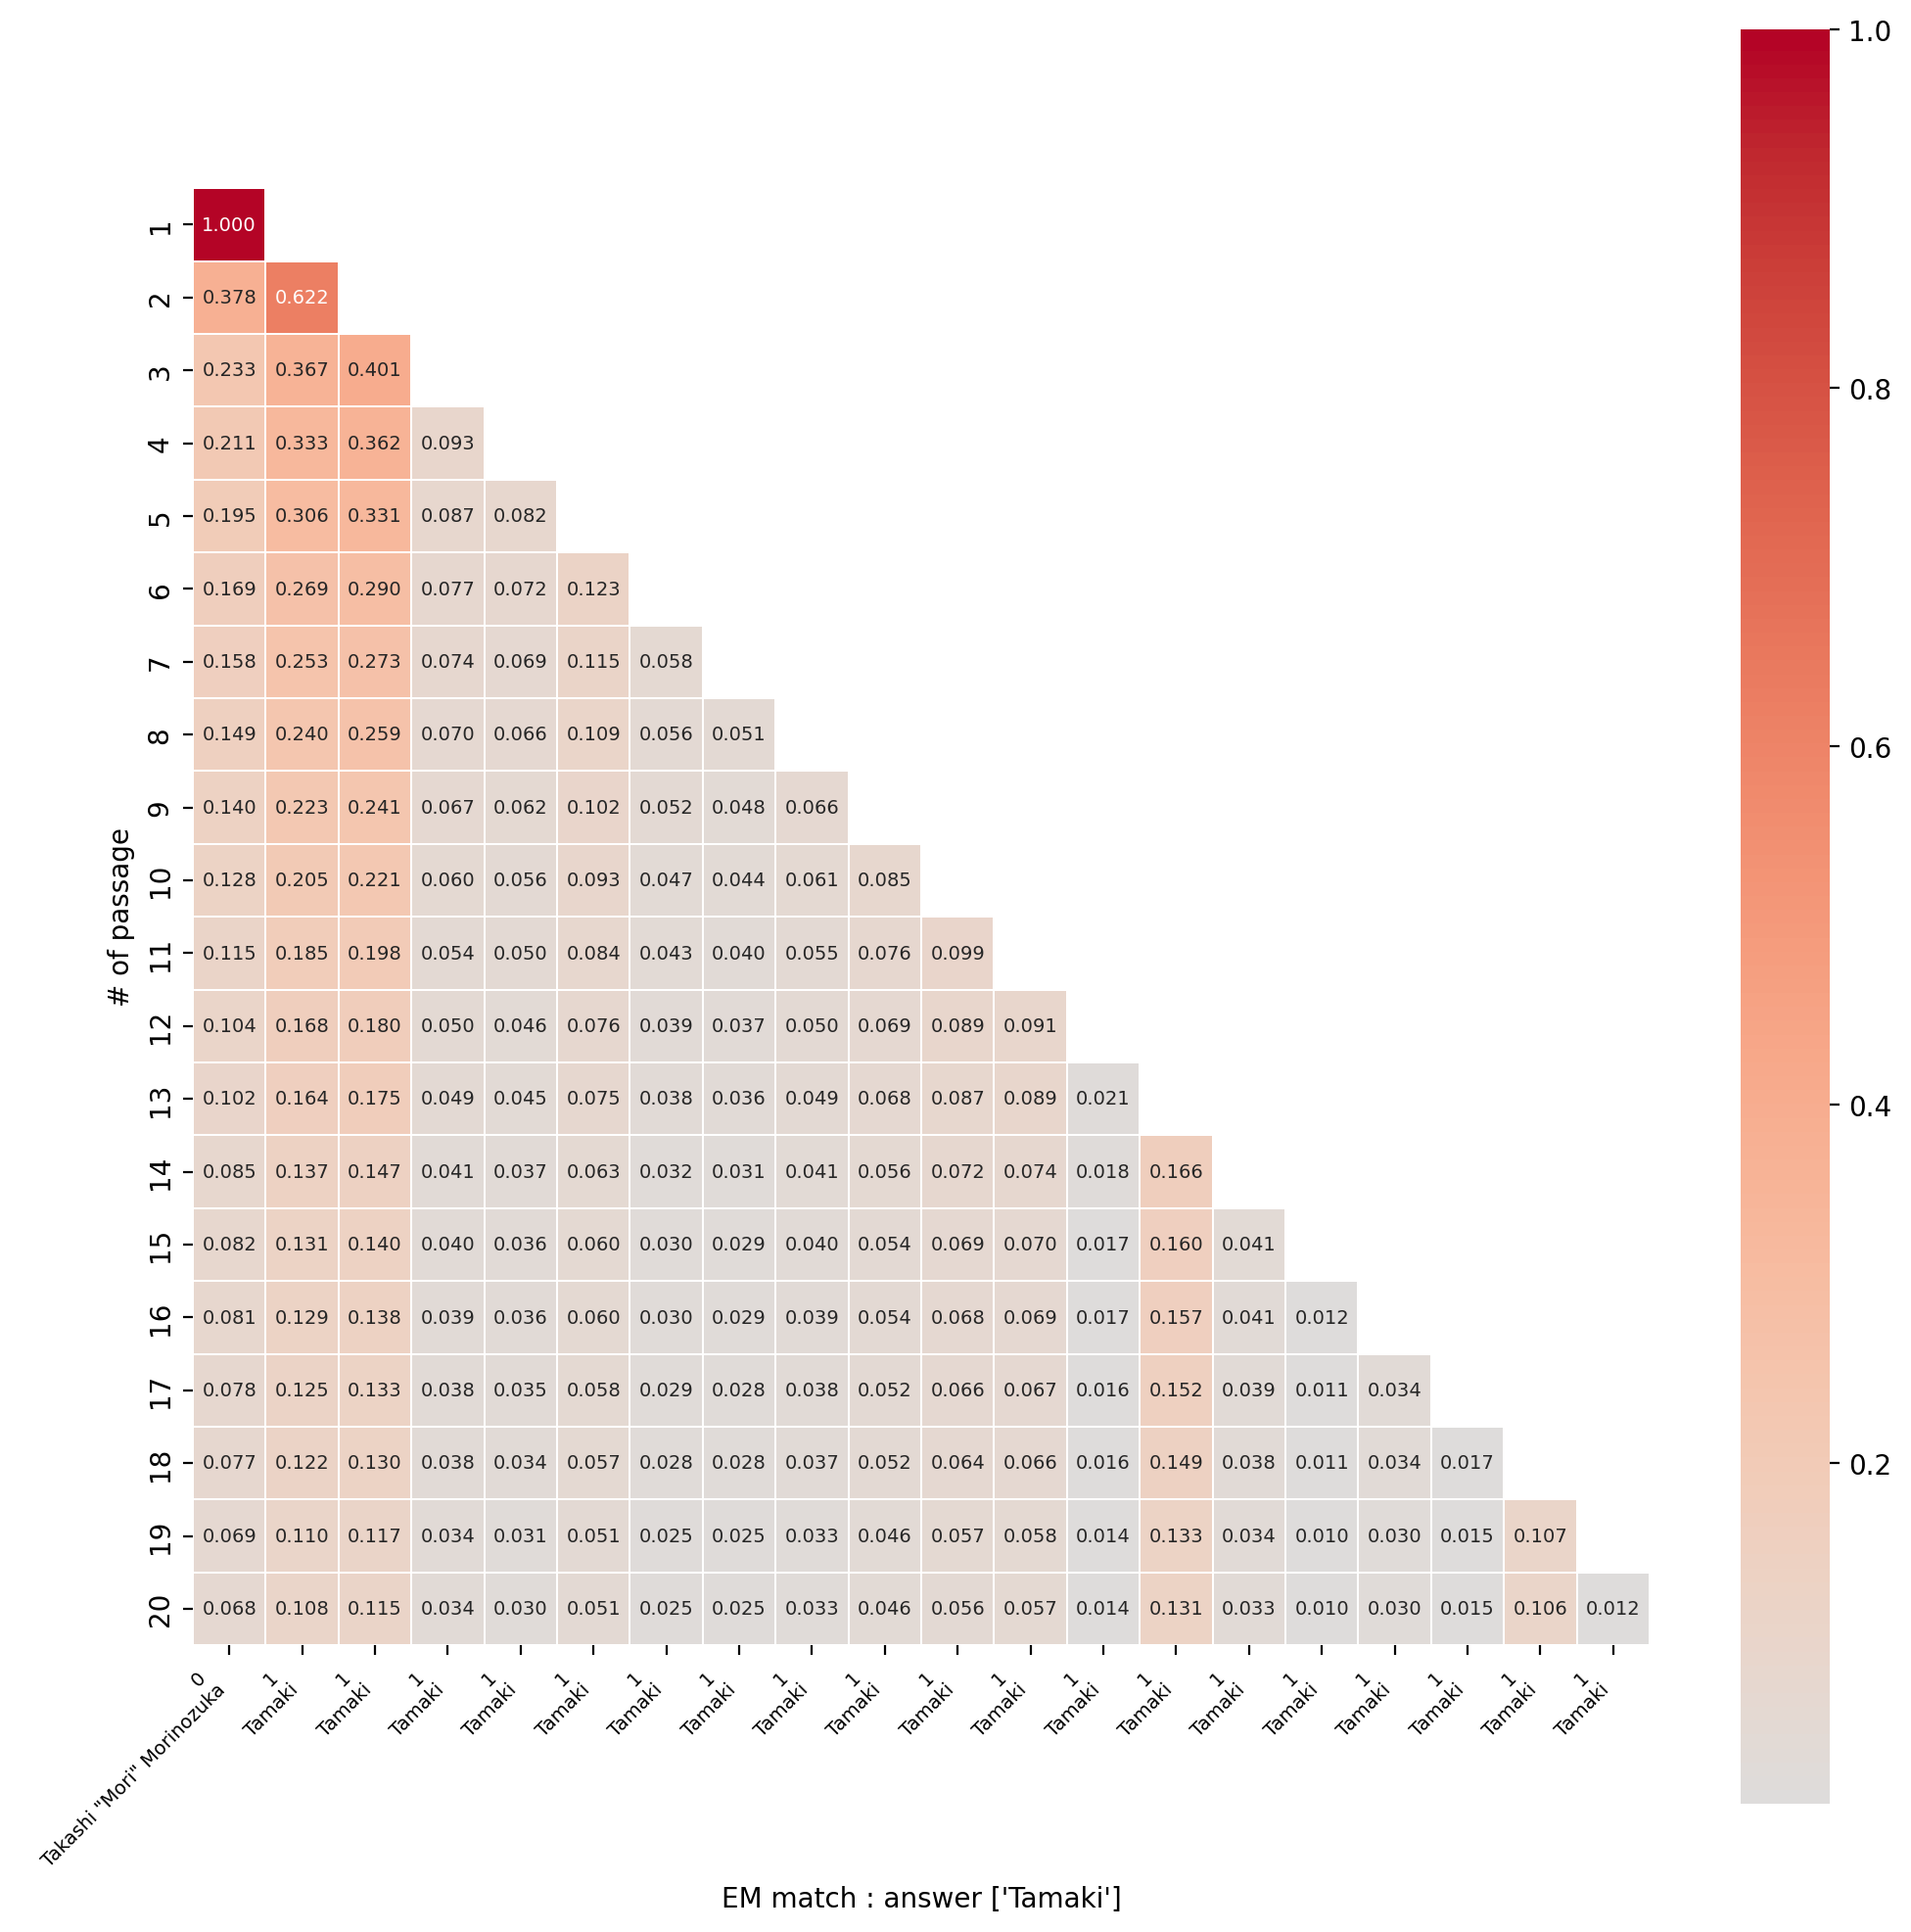

In [29]:
index = 100
passage_size = 20
option = 'softmax'
last_np_array_attention, x_tick_labels, answer = transform_to_np(index, input_attention, passage_size, option)
get_heatmap(last_np_array_attention, x_tick_labels, answer)

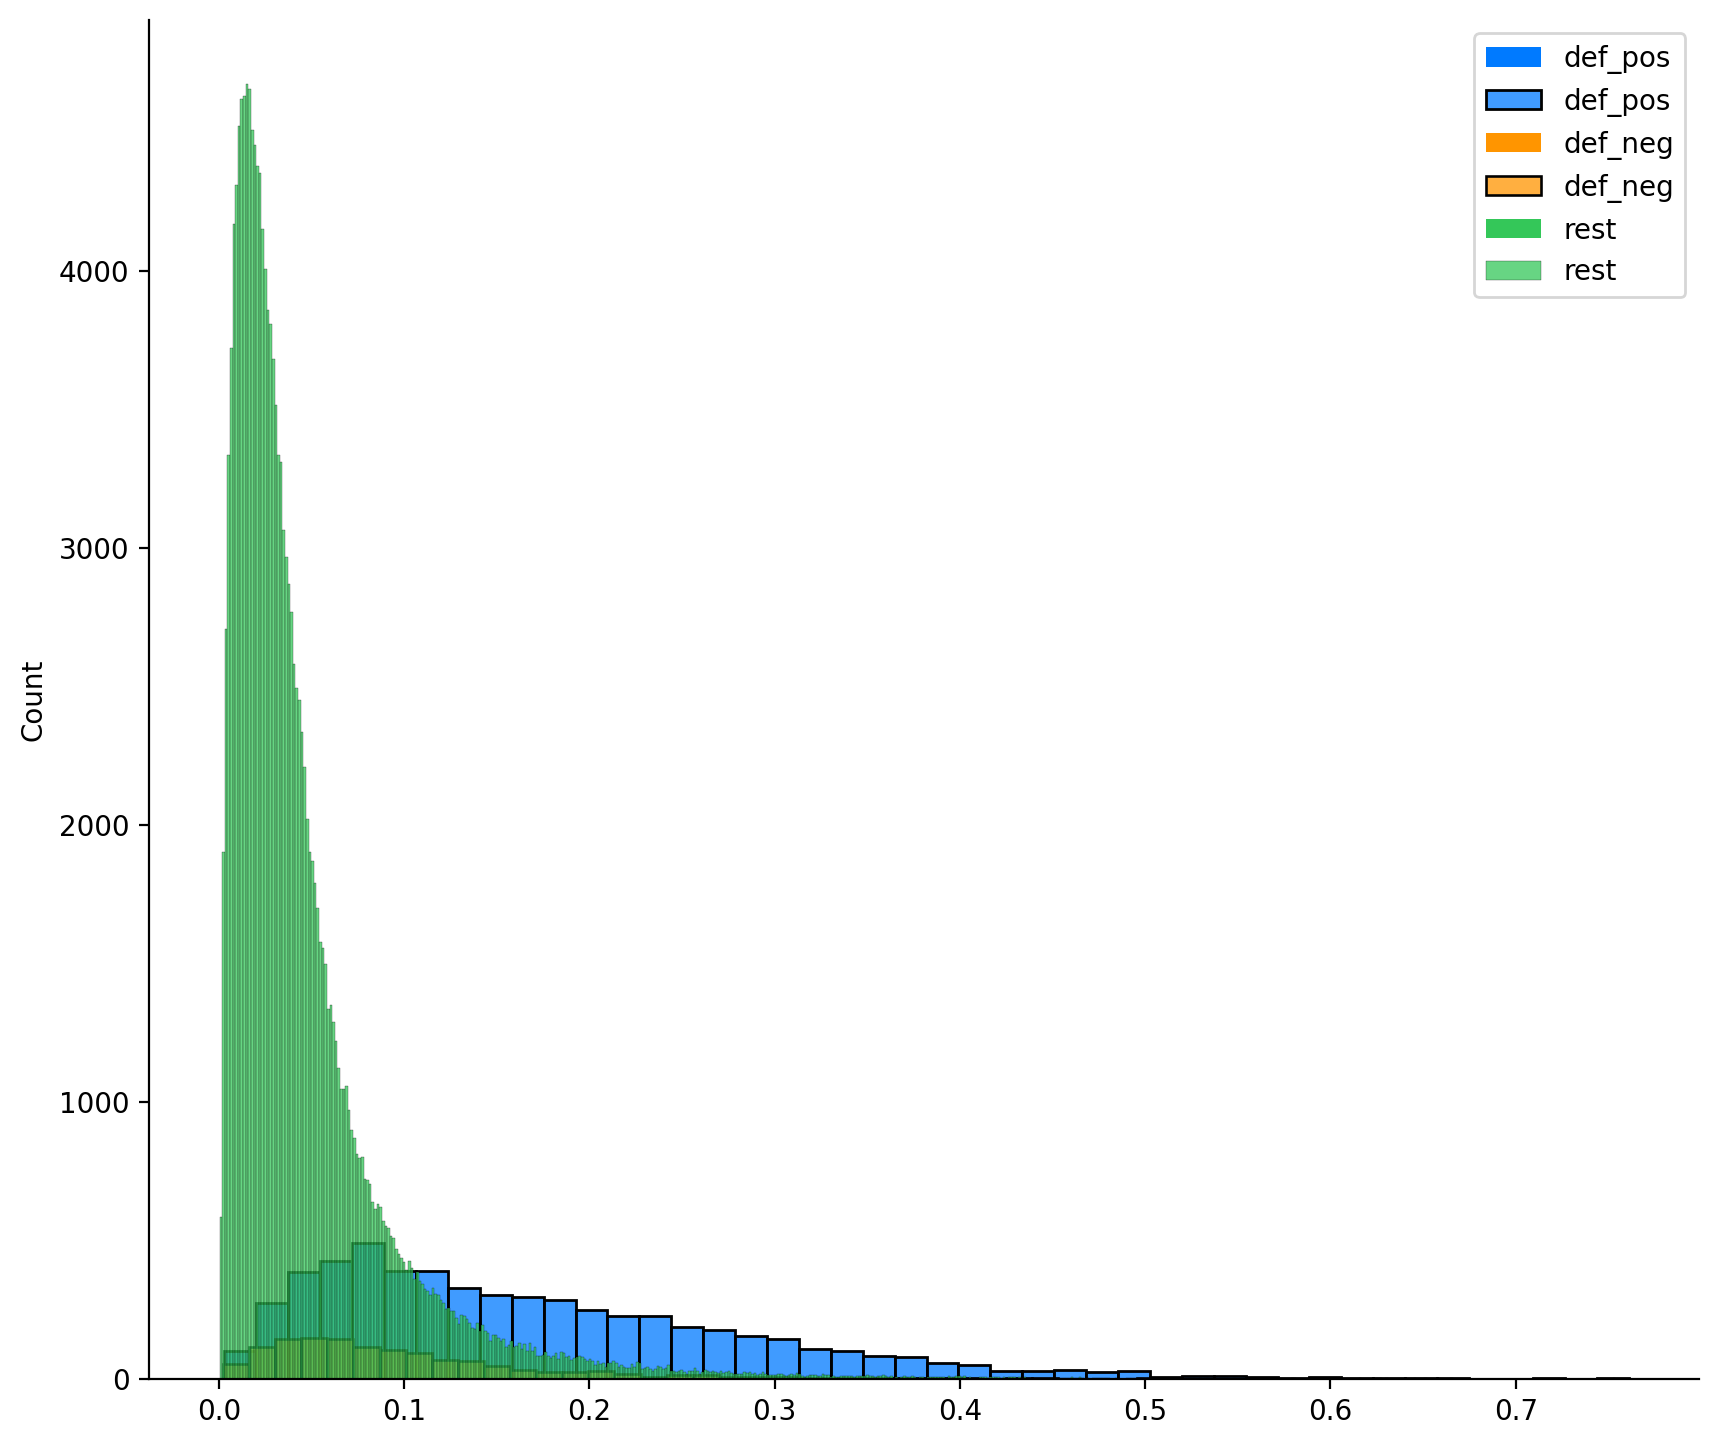

In [30]:
last_atten_def_pos, last_atten_def_neg, last_atten_rest = get_attention_defpos_defneg_rest(input_attention, passage_size)
get_distplot(last_atten_def_pos, last_atten_def_neg,  last_atten_rest)

### Result - removing passages by attention score
    - if attention score of passages are greater than the threshold score, use those passages only
    - Otherwise, use top-20
    - physicall removing passages not good

| Attention Score | Exact Match |
| --- | ---  |
| AcEM@20 |  58.11 |
| EM@20 (FiD w/ 20 psgs) |  50.21 |
| 0.025 |  49.85 |
| 0.05 |  48.80 |
| 0.075 |  46.65 |
| 0.1 |  44.22 |
| 0.2 |  46.41 |

## 2 Passges Level Attention Score on Last Layer
      : Passage Level Attention Score on the first decoded token on Last Layer

In [31]:
path = f'/data/philhoon-relevance/FiD/results/NQ_DPR/DEV_ATT_TOKEN_LAYERS/NQ_dev_2_context/attention_score.pickle'

In [33]:
data = open_pickle(path)

In [34]:
attention_dict_last_layer = defaultdict(list)
for i in tqdm(range(1, 21)):
    attention_file = f'/data/philhoon-relevance/FiD/results/NQ_DPR/DEV_ATT_TOKEN/NQ_dev_{i}_context/attention_score.pickle'
    data = open_pickle(attention_file)
    for ins in data:
        # get the attention score on the last layer first decoded token
        score = ins['attention_score'][:, 0, :]
        attention_score = score.mean(1)
        attention_score_lst  = attention_score.tolist()

        # id
        id_ = ins['id'].item()
        attention_dict_last_layer[id_].append(attention_score_lst)

  0%|          | 0/20 [00:00<?, ?it/s]

In [35]:
input_attention_last_layer = merge(input_, attention_dict_last_layer)

In [37]:
index = 100
passage_size = 20
option = 'softmax'

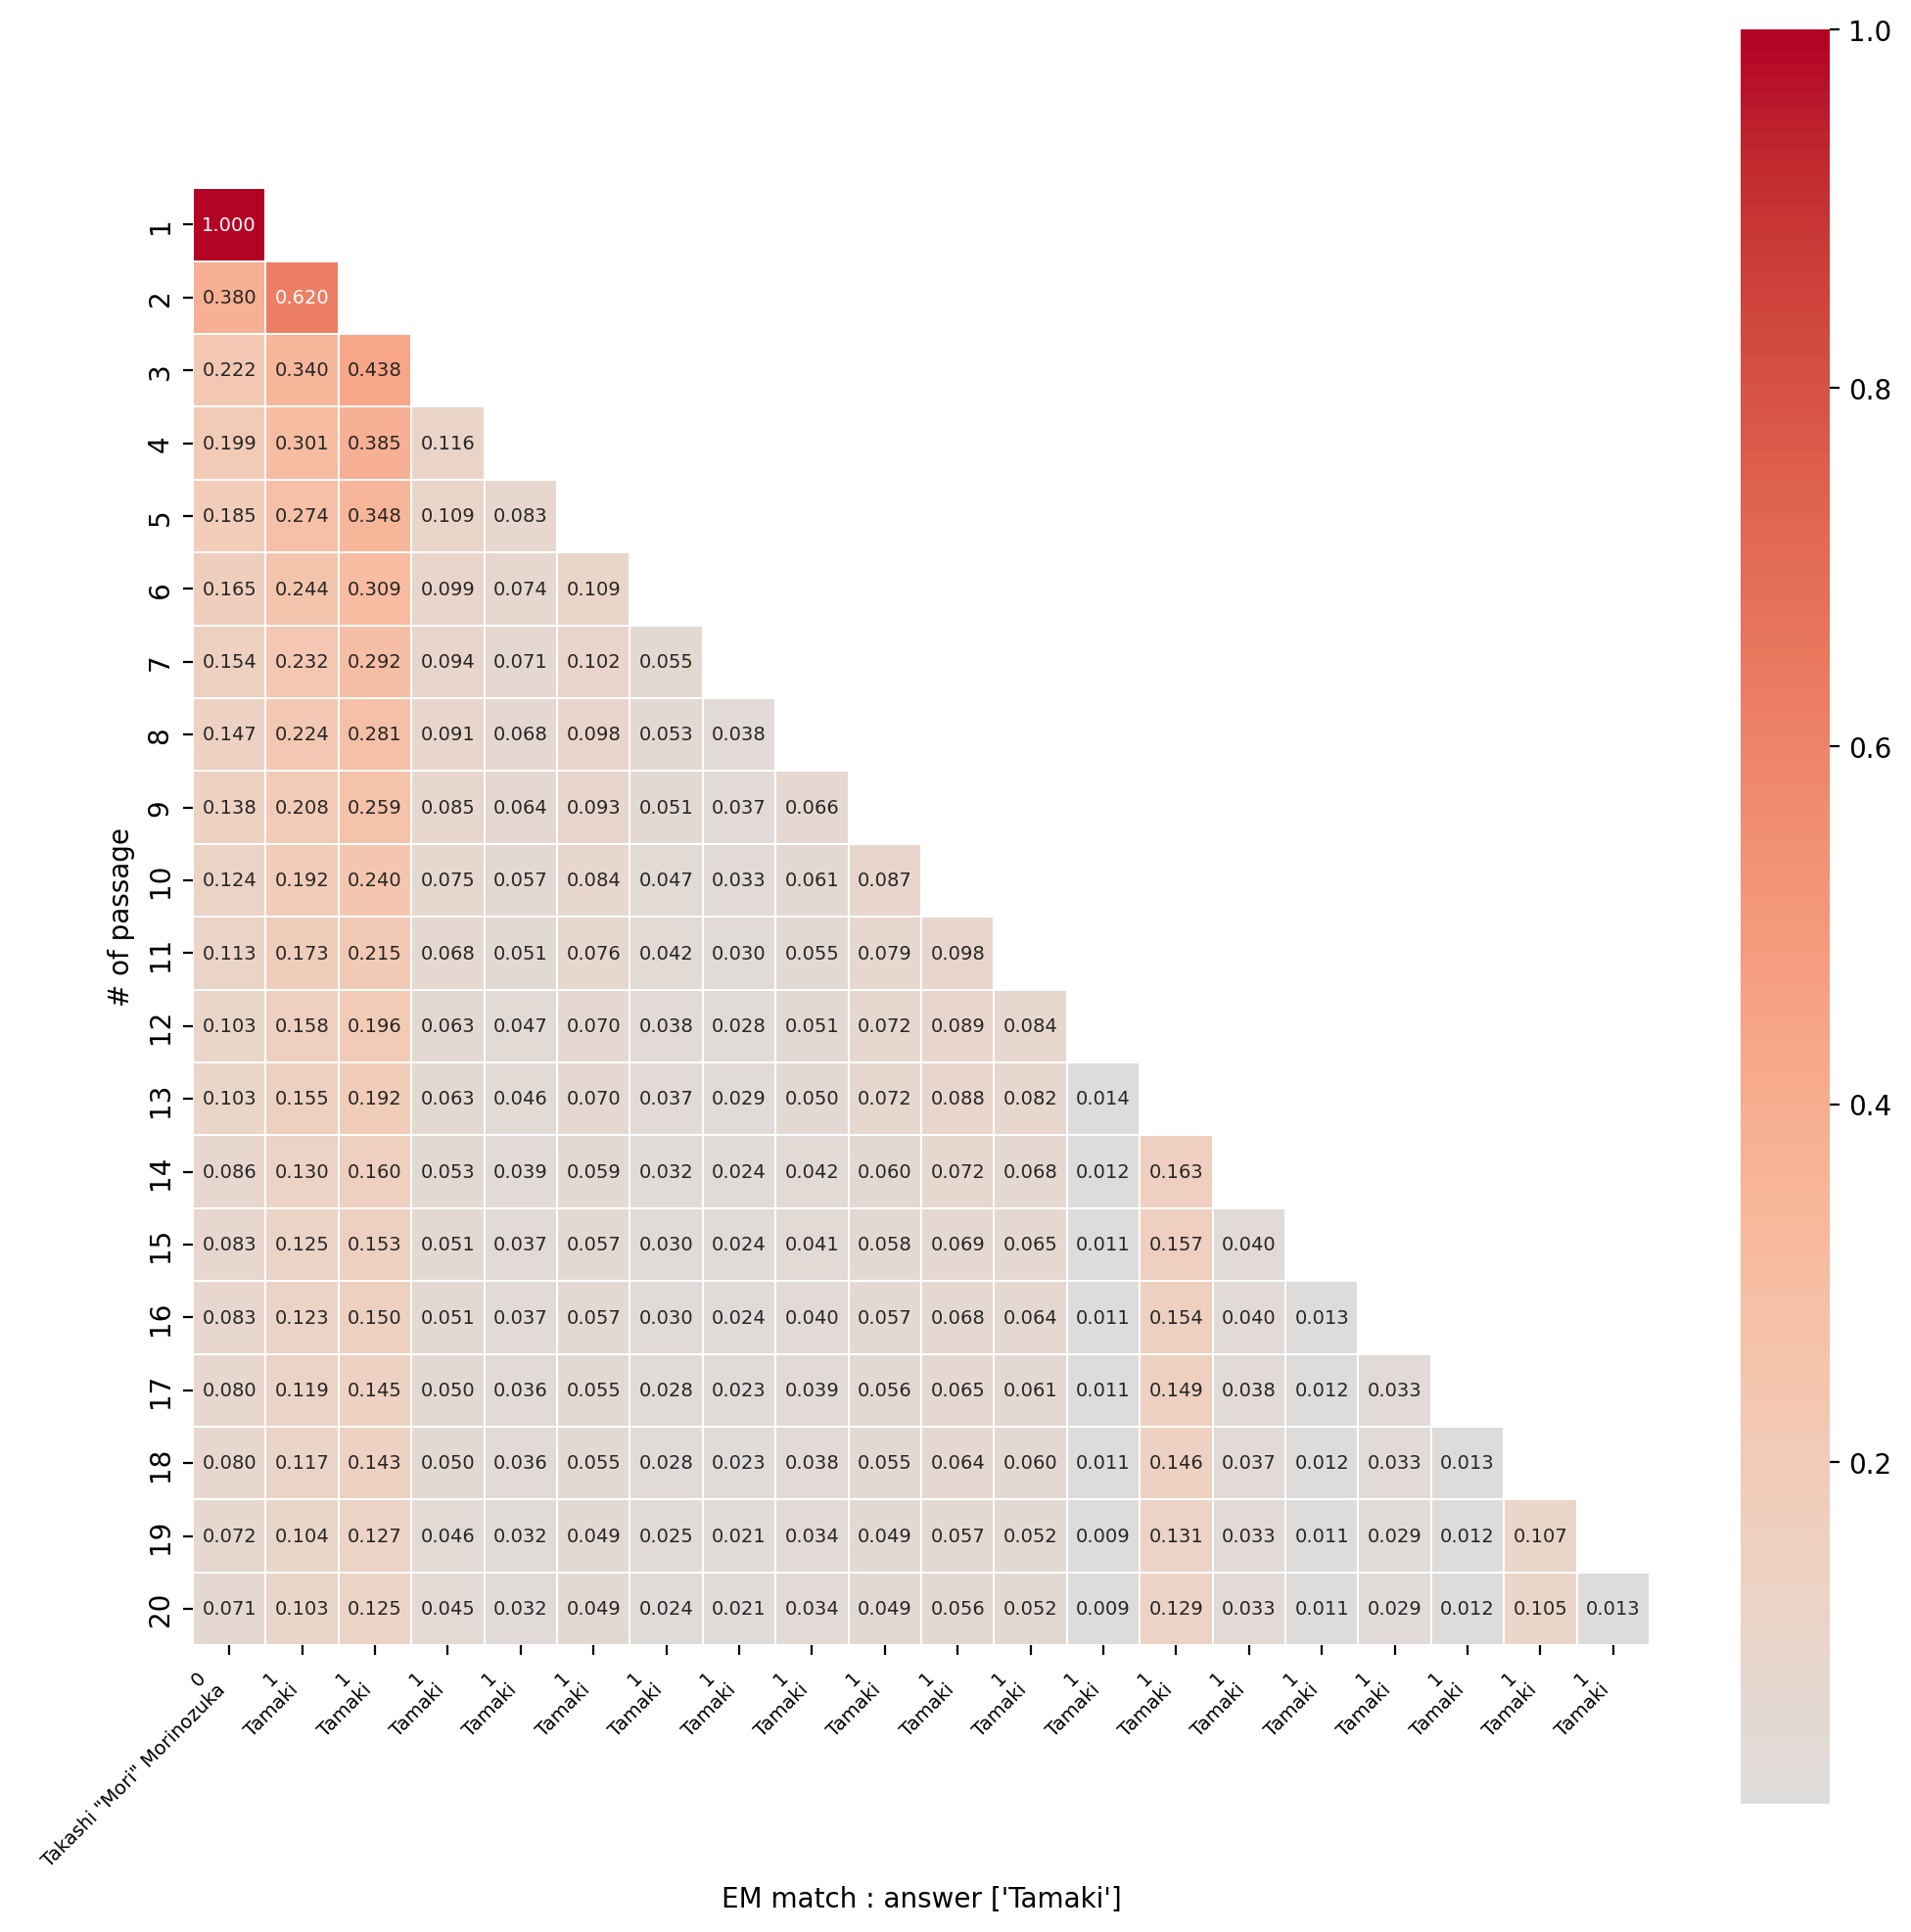

In [38]:
last_np_array_attention, x_tick_labels, answer = transform_to_np(index, input_attention_last_layer, passage_size, option)
get_heatmap(last_np_array_attention, x_tick_labels, answer)

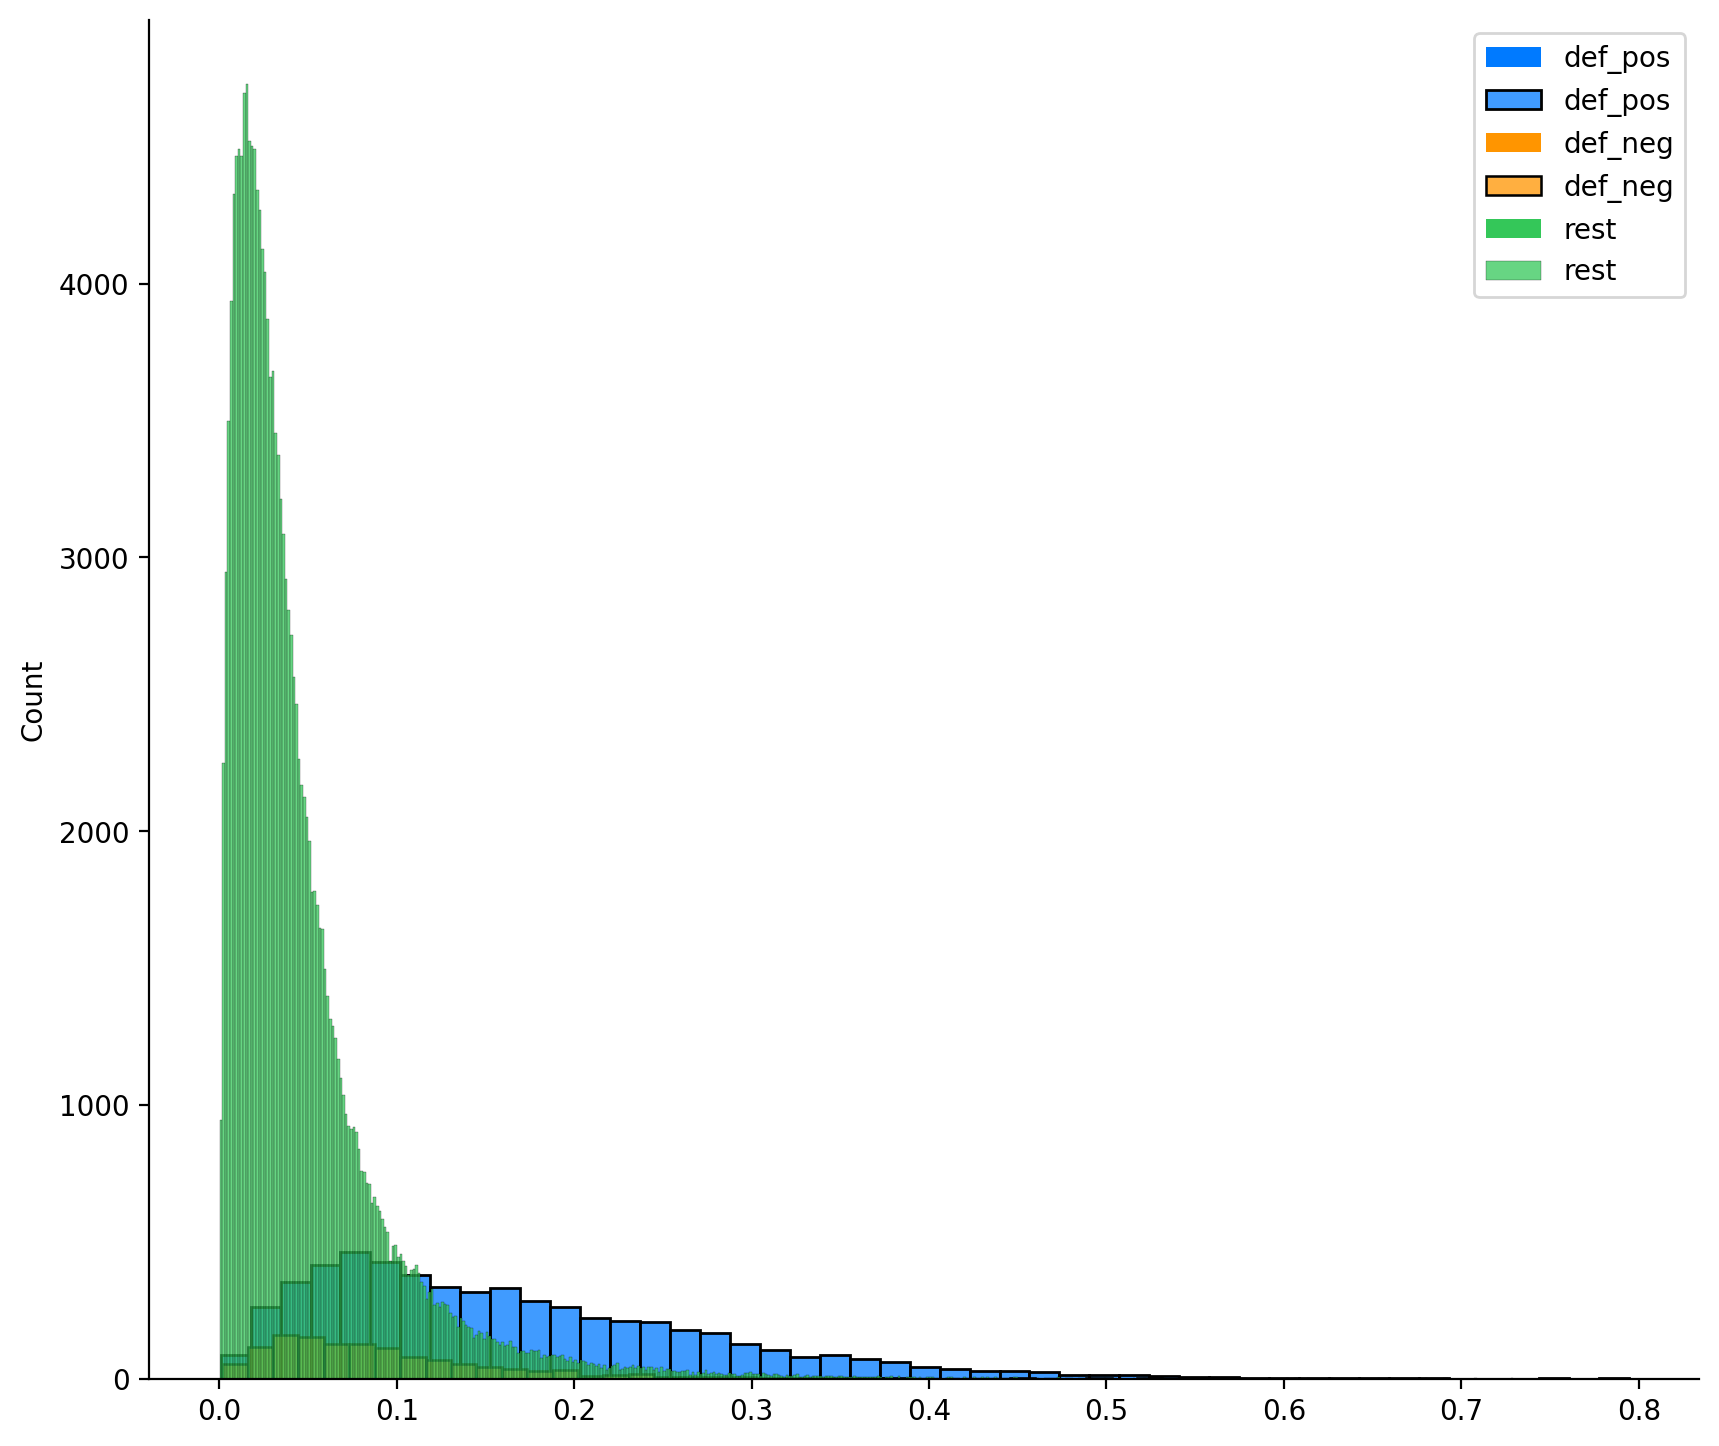

In [39]:
last_atten_def_pos, last_atten_def_neg, last_atten_rest = get_attention_defpos_defneg_rest(input_attention_last_layer, passage_size)
get_distplot(last_atten_def_pos, last_atten_def_neg,  last_atten_rest)

### Result 
    - if attention score of passages are greater than the threshold score, use those passages only
    - Otherwise, use top-20
    - physicall removing passages not good



| Attention Score | Exact Match |
| --- | ---  |
| AcEM@20 |  58.11 |
| EM@20 (FiD w/ 20 psgs) |  50.21 |
| 0.025 |  49.89 |
| 0.05 |  49.00 |
| 0.075 |  46.85 |
| 0.1 |  44.62 |
| 0.2 |  46.48 |

## 3 Token Level Attention Score on Last Layer (Max)
      : Token Level Attention Score on the first decoded token on Last Layer

In [41]:
attention_path = f'/data/philhoon-relevance/FiD/results/NQ_DPR/DEV_ATT_TOKEN/'
print(attention_path)

/data/philhoon-relevance/FiD/results/NQ_DPR/DEV_ATT_TOKEN/


In [42]:
attention_max_first_filename = '/data/philhoon-relevance/FiD/results/NQ_DPR/DEV_ATT_TOKEN/atten_max_last.pickle'

In [43]:
attention_max = open_pickle(attention_max_first_filename)

In [44]:
attention_max_data = merge(input_, attention_max)

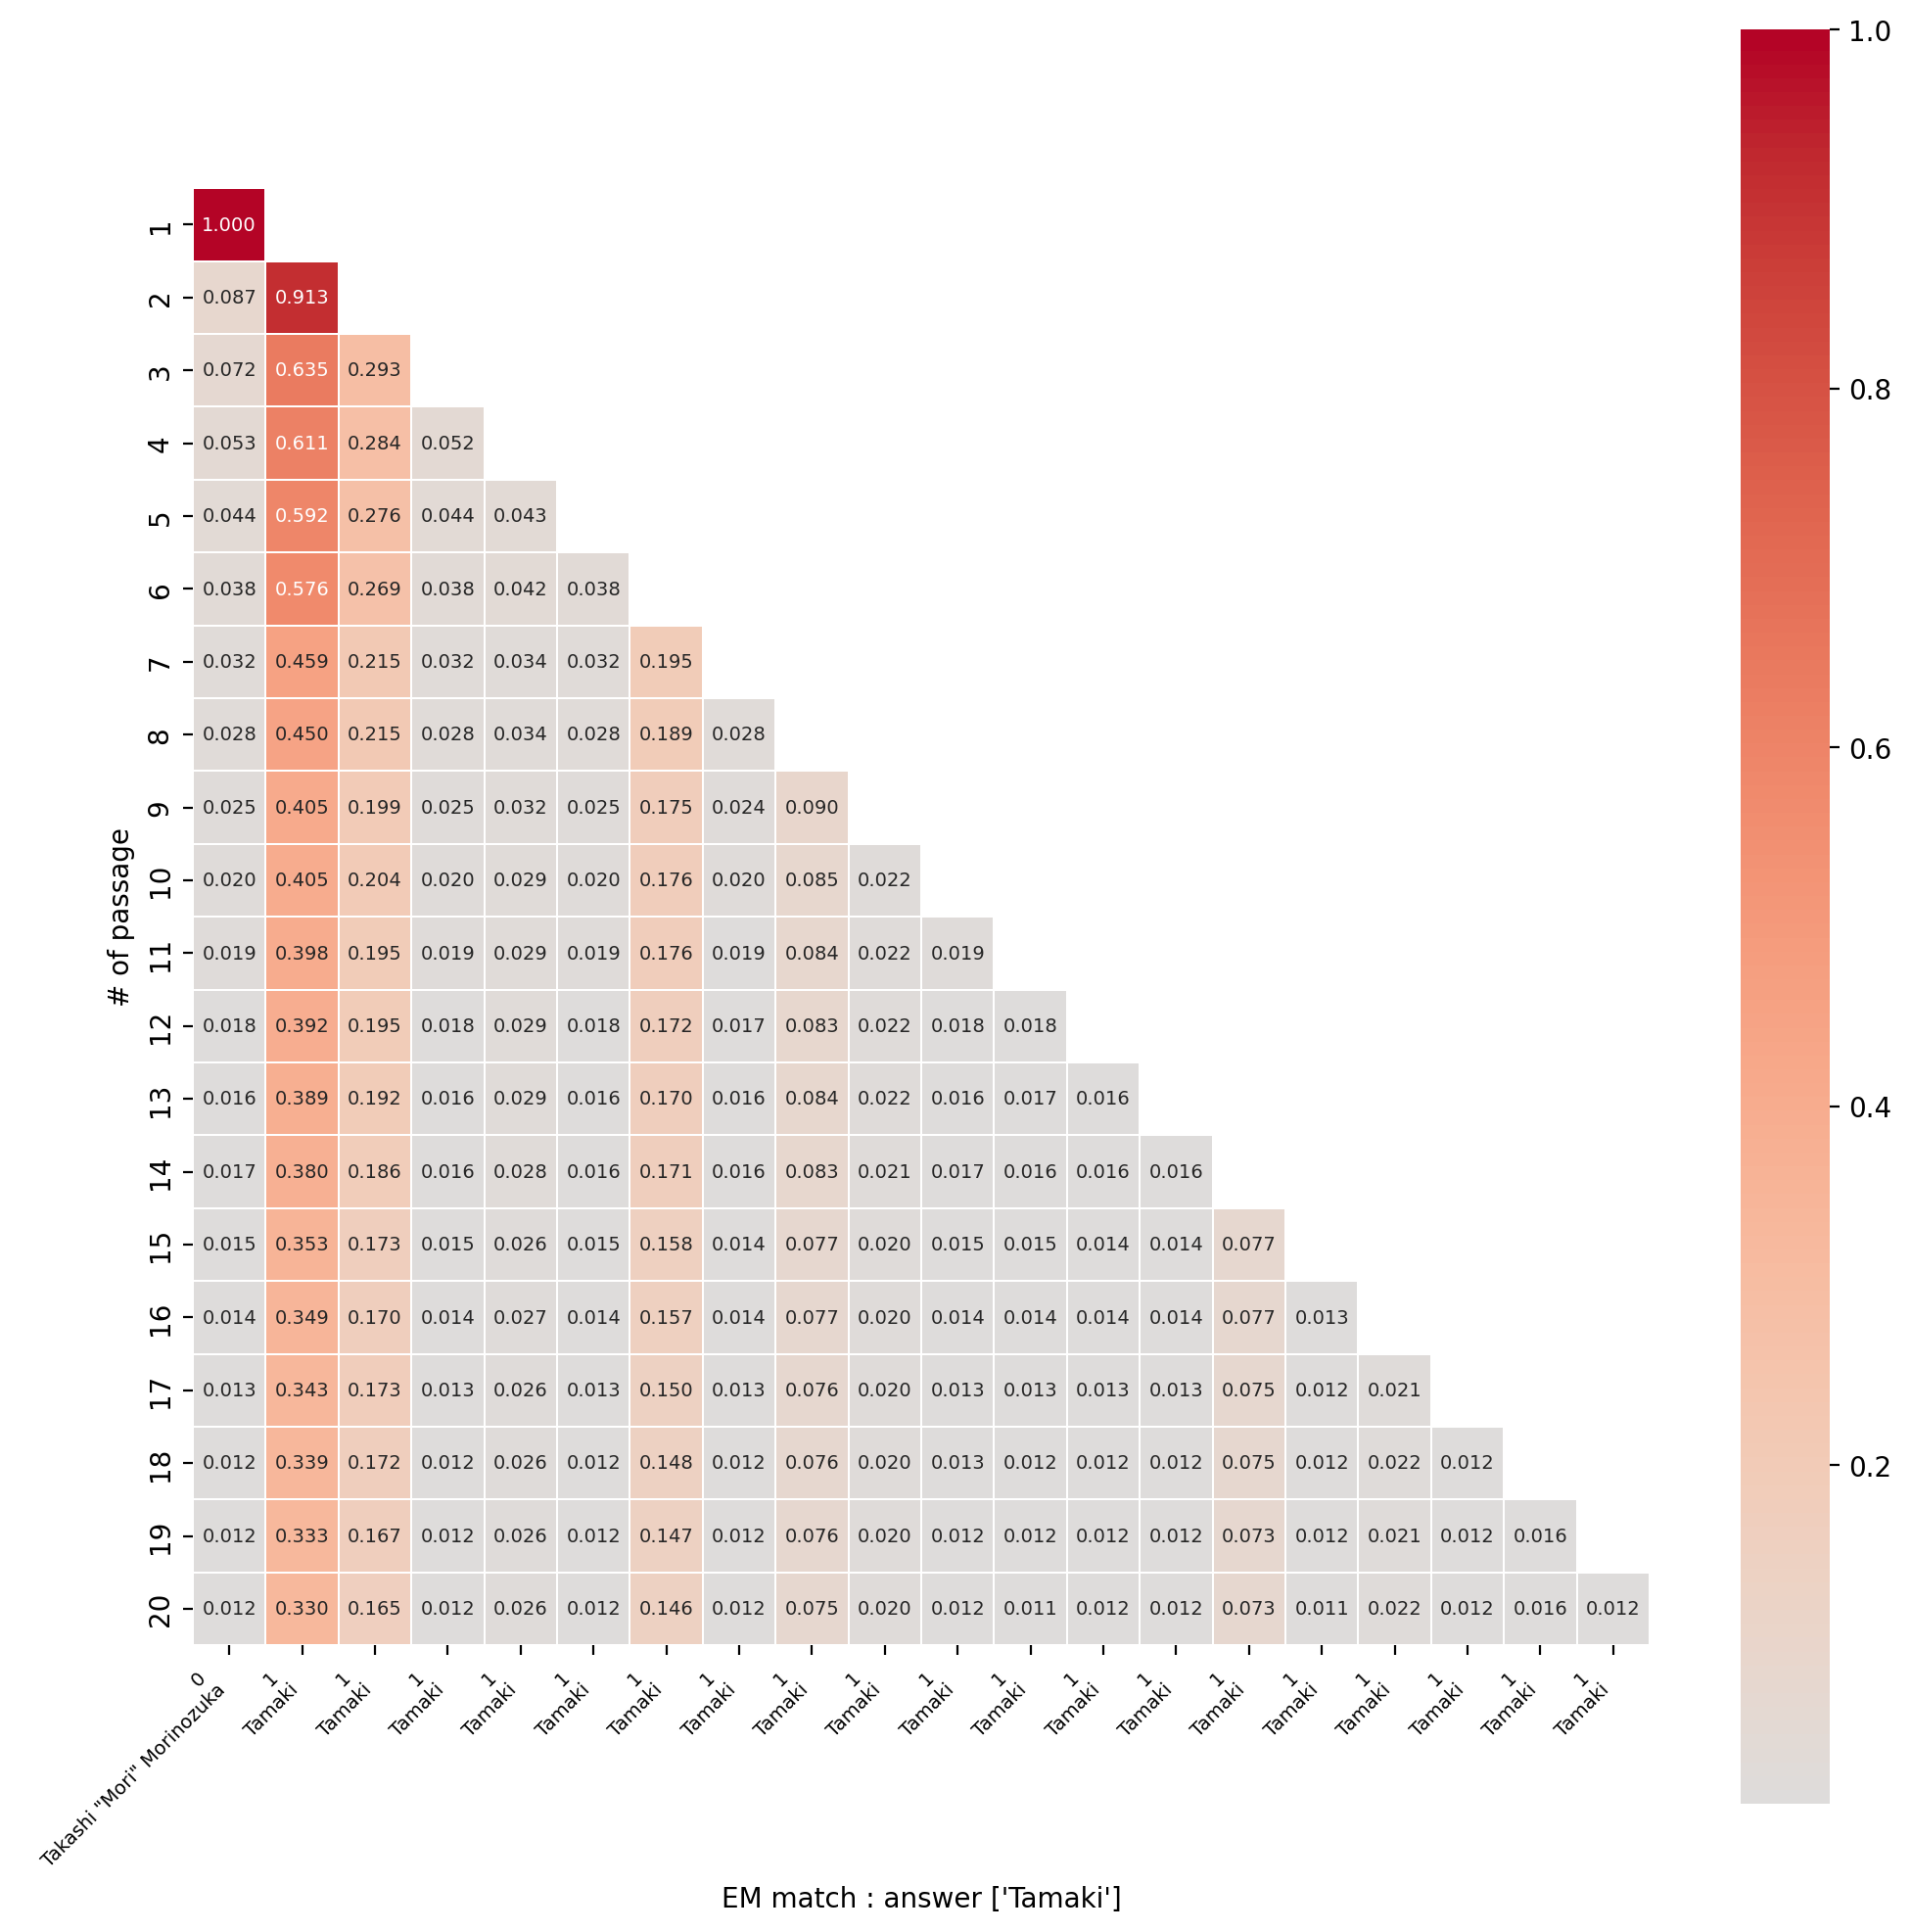

In [45]:
index = 100
passage_size = 20
option = 'softmax'
last_np_array_attention, x_tick_labels, answer = transform_to_np(index, attention_max_data, passage_size, option)
get_heatmap(last_np_array_attention, x_tick_labels, answer)

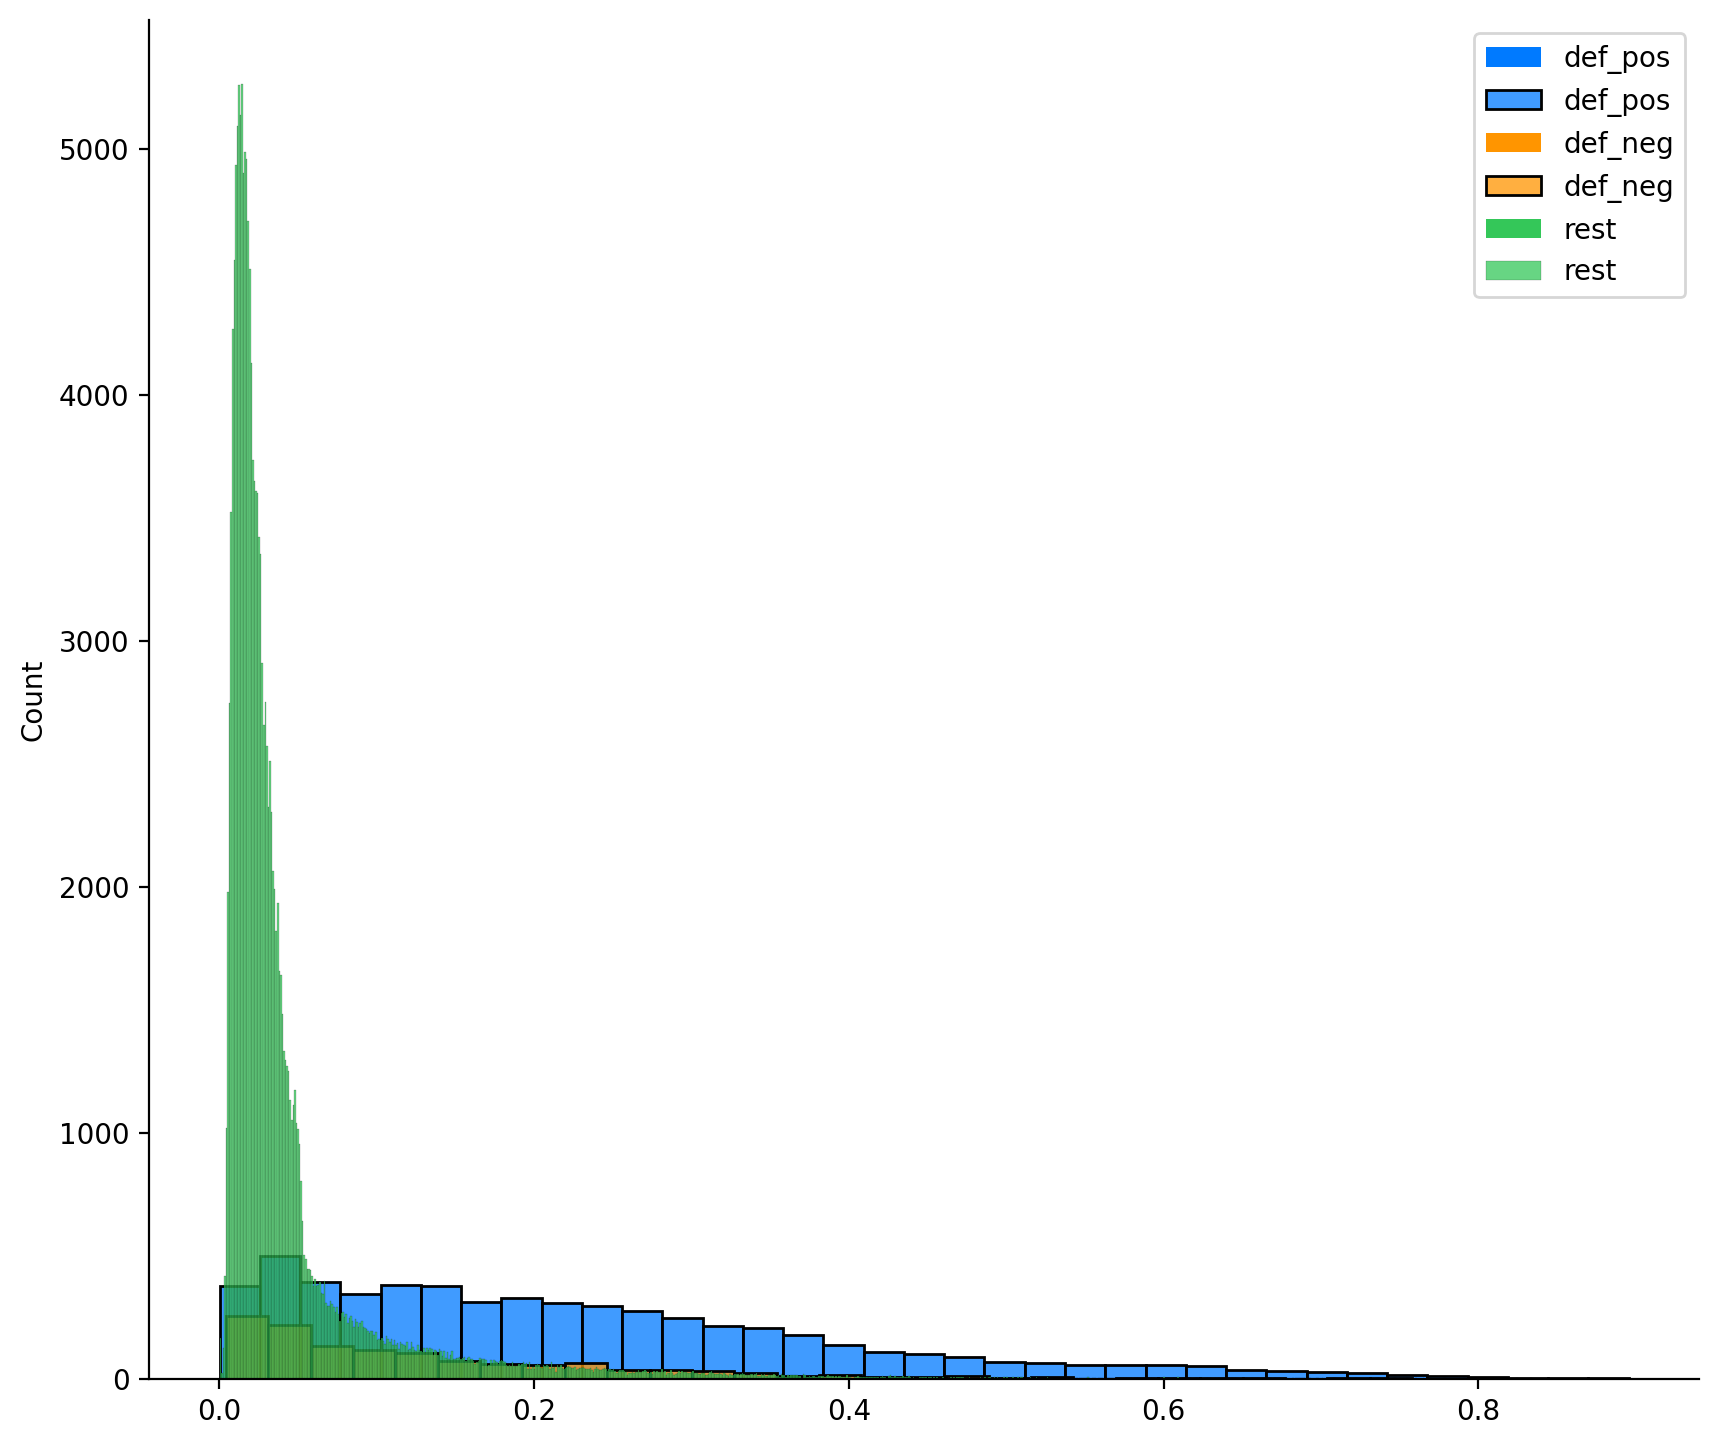

In [46]:
last_atten_def_pos, last_atten_def_neg, last_atten_rest = get_attention_defpos_defneg_rest(attention_max_data, passage_size)
get_distplot(last_atten_def_pos, last_atten_def_neg,  last_atten_rest)

### Result - removing passages by attention max score
    - if attention score of passages are greater than the threshold score, use those passages only
    - Otherwise, use top-20
    - physicall removing passages not good



| Attention Score | Exact Match |
| --- | ---  |
| AcEM@20 |  58.11 |
| EM@20 (FiD w/ 20 psgs) |  50.21 |
| 0.025 |  49.5 |
| 0.05 |  49.11 |
| 0.075 |  48.30 |
| 0.1 |  47.55 |
| 0.2 |  46.59 |

## 4 Token Level Attention Score on First Layer (Min)
    : Token Level Attention Score on the first decoded token on First Layer

In [50]:
attention_path = '/data/philhoon-relevance/FiD/results/NQ_DPR/DEV_ATT_TOKEN_LAYERS/'
print(attention_path)

/data/philhoon-relevance/FiD/results/NQ_DPR/DEV_ATT_TOKEN_LAYERS/


In [51]:
attention_max_first_filename = '/data/philhoon-relevance/FiD/results/NQ_DPR/DEV_ATT_TOKEN_LAYERS/atten_max_first.pickle'

In [52]:
attention_max_first = open_pickle(attention_max_first_filename)

In [53]:
attention_max_first_data = merge(input_, attention_max_first)

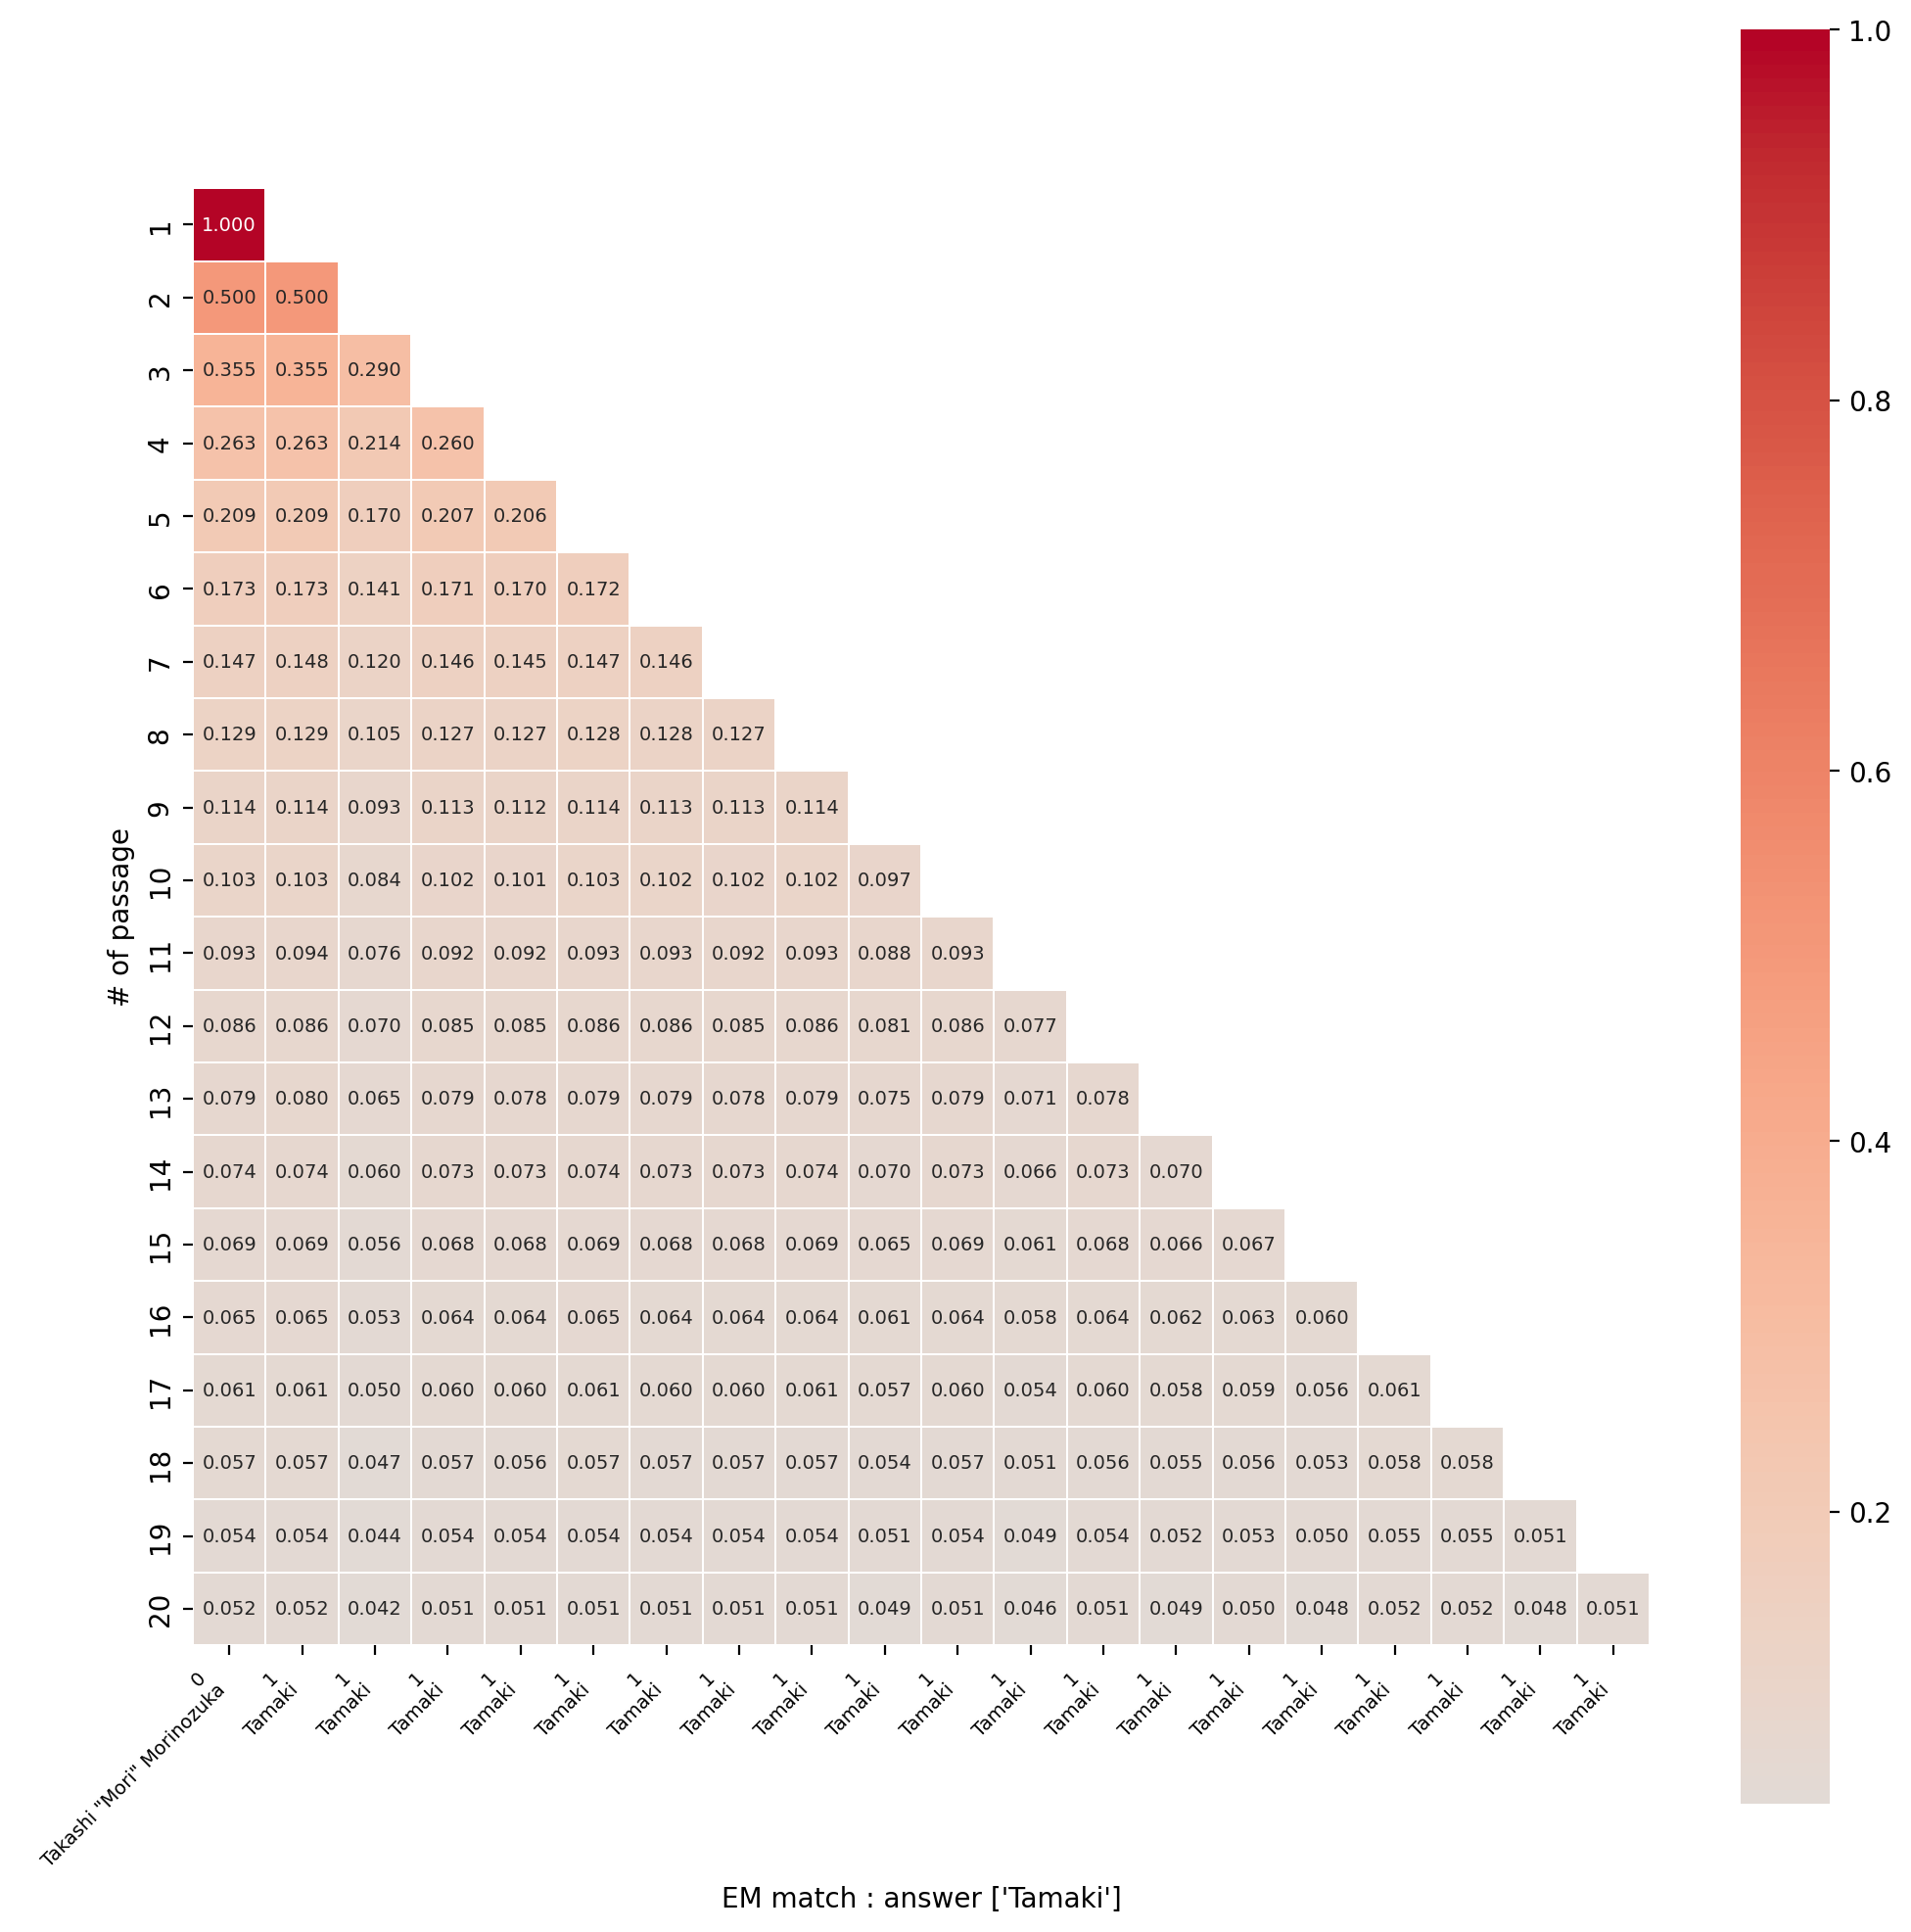

In [54]:
index = 100
passage_size = 20
option = 'softmax'
first_np_array_attention, x_tick_labels, answer = transform_to_np(index, attention_max_first_data, passage_size, option)
get_heatmap(first_np_array_attention, x_tick_labels, answer)

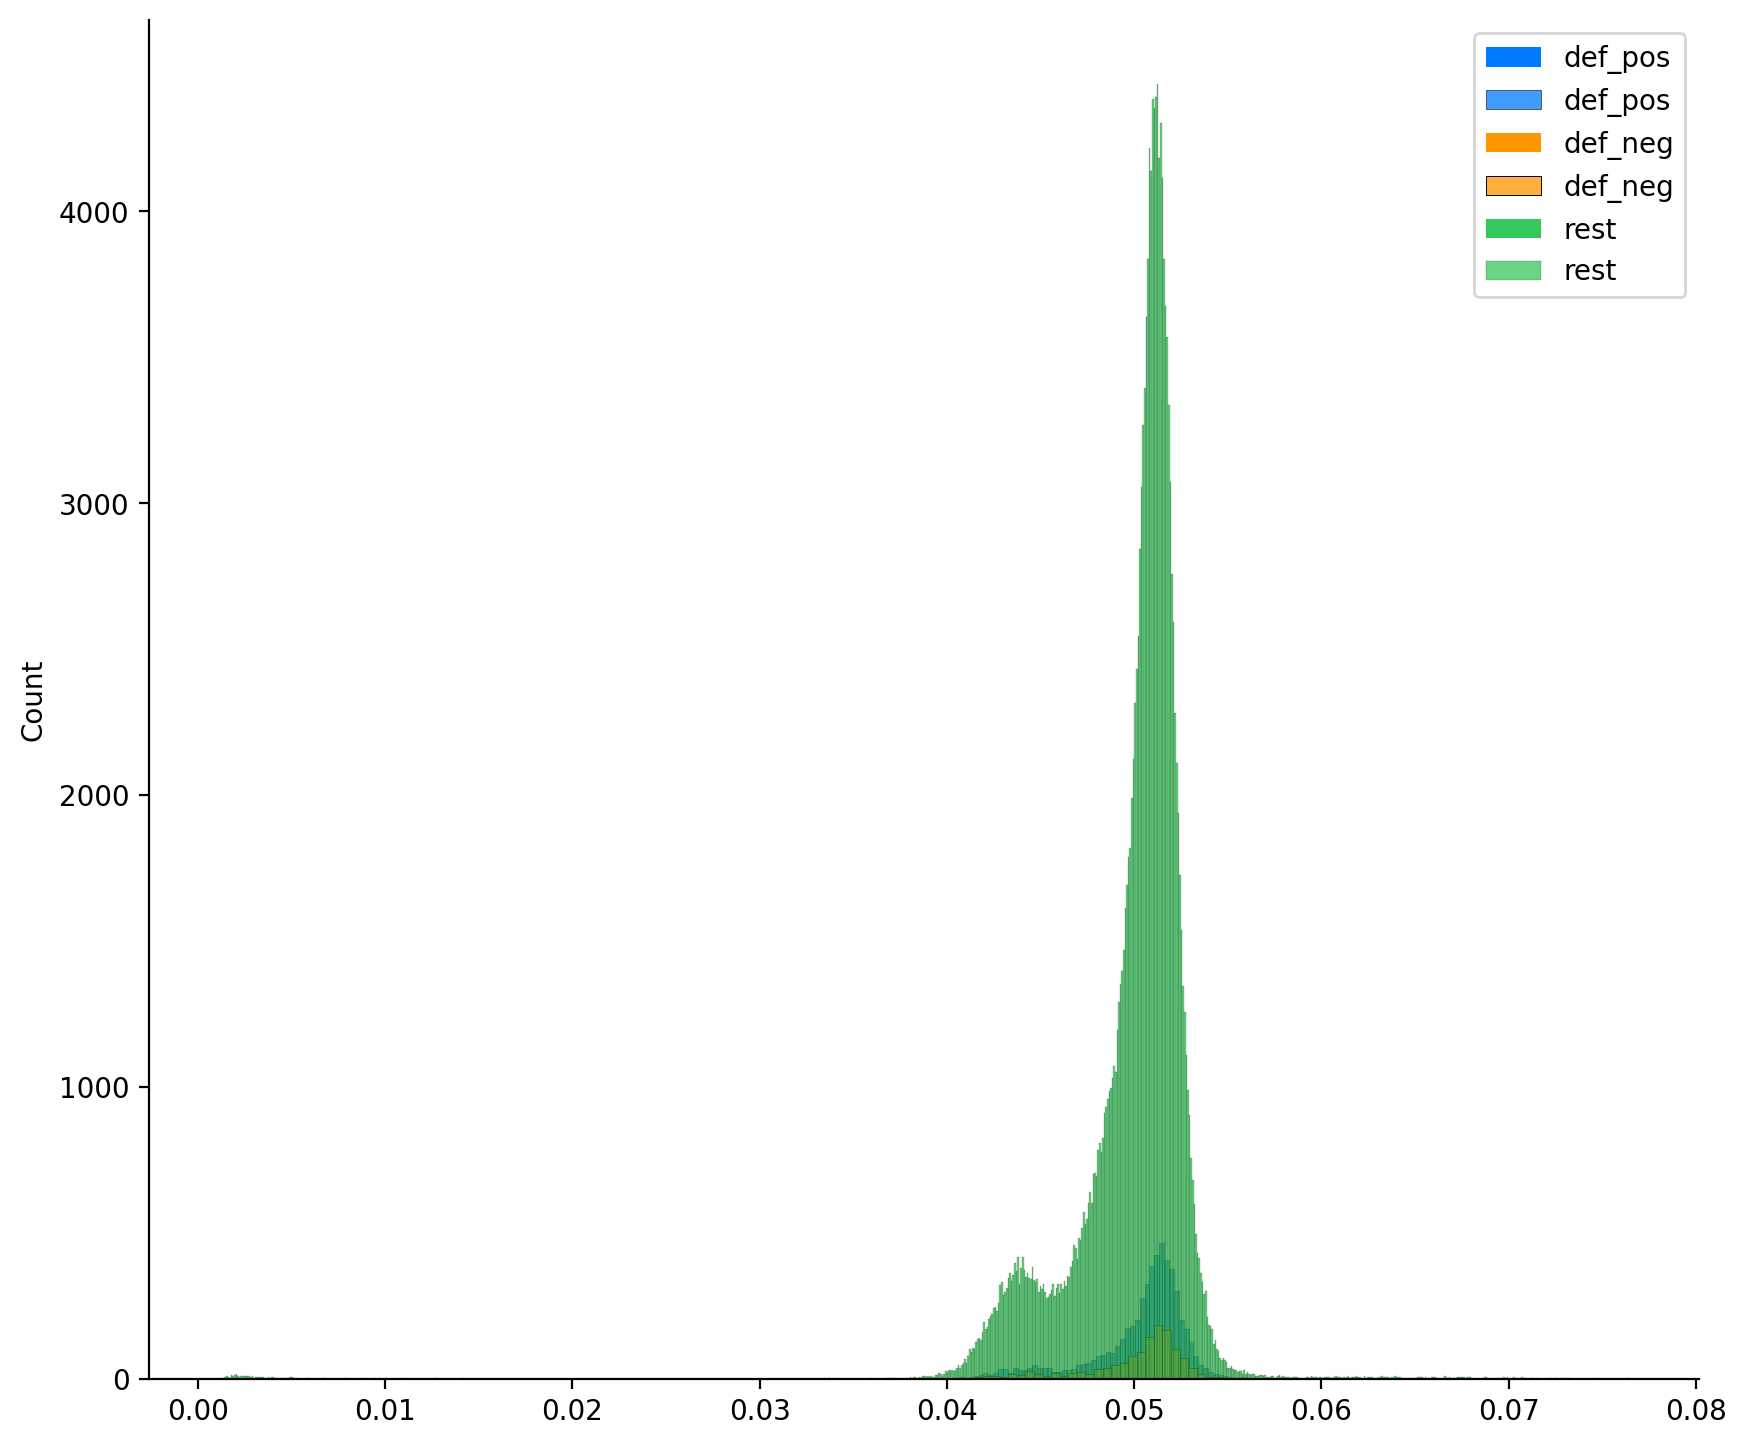

In [55]:
last_atten_def_pos, last_atten_def_neg, last_atten_rest = get_attention_defpos_defneg_rest(attention_max_first_data, passage_size)
get_distplot(last_atten_def_pos, last_atten_def_neg,  last_atten_rest)